In [1]:
'''
Add imports here as they are required
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
'''
Import the raw dataset, automatically parse the 'Date' column as a datetime object
'''
dfweather = pd.read_csv('bom_weather.csv', encoding = 'ISO-8859-1', parse_dates = ['Date'], dayfirst = True)

dfweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6224 entries, 0 to 6223
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               6224 non-null   datetime64[ns]
 1   Minimum temperature (C)            6207 non-null   float64       
 2   Maximum temperature (C)            6204 non-null   float64       
 3   Rainfall (mm)                      6178 non-null   float64       
 4   Evaporation (mm)                   897 non-null    float64       
 5   Sunshine (hours)                   0 non-null      float64       
 6   Direction of maximum wind gust     6176 non-null   object        
 7   Speed of maximum wind gust (km/h)  6176 non-null   float64       
 8   Time of maximum wind gust          6176 non-null   object        
 9   9am Temperature (C)                6210 non-null   float64       
 10  9am relative humidity (%)          6

In [3]:
dfweather.head()

Date  Minimum temperature (C)  Maximum temperature (C)  Rainfall (mm)  \
0 2004-03-01                     12.8                     18.6            0.0   
1 2004-03-02                      6.7                     28.7            0.0   
2 2004-03-03                     12.8                     33.6            0.0   
3 2004-03-04                     16.1                     36.2            0.0   
4 2004-03-05                     16.2                     19.7            0.0   

   Evaporation (mm)  Sunshine (hours) Direction of maximum wind gust   \
0               6.0               NaN                             SSE   
1               5.0               NaN                             ESE   
2               6.6               NaN                             ENE   
3              10.0               NaN                             NNW   
4               NaN               NaN                              SE   

   Speed of maximum wind gust (km/h) Time of maximum wind gust  \
0                               33.0                     13:59   
1                               31.0                     15:55   
2                               33.0                     13:14   
3                               65.0                     12:54   
4                               35.0                     16:48   

   9am Temperature (C)  ...  9am cloud amount (oktas)  9am wind direction  \
0                 15.0  ...                       NaN                 SSE   
1                 14.7  ...                       NaN                 ESE   
2                 21.6  ...                       NaN                 NNE   
3                 21.6  ...                       NaN                 NNE   
4                 16.5  ...                       NaN                 SSE   

  9am wind speed (km/h)  9am MSL pressure (hPa)  3pm Temperature (C)  \
0                  17.0                  1025.0                 17.6   
1                   6.0                  1023.5                 28.4   
2                  17.0                  1022.3                 32.4   
3                  20.0                  1016.7                 34.4   
4                  20.0                  1018.5                 19.3   

   3pm relative humidity (%)  3pm cloud amount (oktas)  3pm wind direction  \
0                       51.0                       NaN                 SSE   
1                       25.0                       NaN                 ESE   
2                       18.0                       NaN                 ENE   
3                       17.0                       NaN                 NNW   
4                       54.0                       NaN                  SE   

  3pm wind speed (km/h)  3pm MSL pressure (hPa)  
0                  20.0                  1024.8  
1                  11.0                  1020.4  
2                  22.0                  1020.0  
3                  37.0                  1011.8  
4                  20.0                  1017.1  

[5 rows x 21 columns]

In [4]:
'''
There are three features that contain no data - dropping them

Evaporation data stops at 2009 - dropping field
'''
dfweather.dropna(how='all', axis = 1, inplace=True)
dfweather.drop('Evaporation (mm)', axis = 1, inplace = True)


In [5]:
dfweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6224 entries, 0 to 6223
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               6224 non-null   datetime64[ns]
 1   Minimum temperature (C)            6207 non-null   float64       
 2   Maximum temperature (C)            6204 non-null   float64       
 3   Rainfall (mm)                      6178 non-null   float64       
 4   Direction of maximum wind gust     6176 non-null   object        
 5   Speed of maximum wind gust (km/h)  6176 non-null   float64       
 6   Time of maximum wind gust          6176 non-null   object        
 7   9am Temperature (C)                6210 non-null   float64       
 8   9am relative humidity (%)          6174 non-null   float64       
 9   9am wind direction                 6219 non-null   object        
 10  9am wind speed (km/h)              5

In [6]:
'''
The current colum names are descriptive, but unweildly - going to rename them to be a bit easier to manage
'''

new_col_names = ['date', 'mintemp', 'maxtemp', 'rainfall', 'dir_maxgust', 'spd_maxgust', 'time_maxgust', '9am_temp', '9am_rh', '9am_wd', '9am_ws', '9am_mslp', '3pm_temp', '3pm_rh', '3pm_wd', '3pm_ws', '3pm_mslp']
dfweather.columns = new_col_names
dfweather.head()

date  mintemp  maxtemp  rainfall dir_maxgust  spd_maxgust  \
0 2004-03-01     12.8     18.6       0.0         SSE         33.0   
1 2004-03-02      6.7     28.7       0.0         ESE         31.0   
2 2004-03-03     12.8     33.6       0.0         ENE         33.0   
3 2004-03-04     16.1     36.2       0.0         NNW         65.0   
4 2004-03-05     16.2     19.7       0.0          SE         35.0   

  time_maxgust  9am_temp  9am_rh 9am_wd  9am_ws  9am_mslp  3pm_temp  3pm_rh  \
0        13:59      15.0    54.0    SSE    17.0    1025.0      17.6    51.0   
1        15:55      14.7    98.0    ESE     6.0    1023.5      28.4    25.0   
2        13:14      21.6    52.0    NNE    17.0    1022.3      32.4    18.0   
3        12:54      21.6    39.0    NNE    20.0    1016.7      34.4    17.0   
4        16:48      16.5    66.0    SSE    20.0    1018.5      19.3    54.0   

  3pm_wd  3pm_ws  3pm_mslp  
0    SSE    20.0    1024.8  
1    ESE    11.0    1020.4  
2    ENE    22.0    1020.0  
3    NNW    37.0    1011.8  
4     SE    20.0    1017.1

In [7]:
'''
From here, I'm going to start analysing the NaN values in the dataframe

The reporting below shows that there are 430 rows in the dataframe than have a NaN value in one or more features

I'd prefer to drop any data, so I'm going to look at ways to fill the null values.
'''
dfweather[dfweather.isna().any(axis = 1)].info()
display(dfweather[dfweather.isna().any(axis = 1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 8 to 6219
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          430 non-null    datetime64[ns]
 1   mintemp       413 non-null    float64       
 2   maxtemp       410 non-null    float64       
 3   rainfall      384 non-null    float64       
 4   dir_maxgust   382 non-null    object        
 5   spd_maxgust   382 non-null    float64       
 6   time_maxgust  382 non-null    object        
 7   9am_temp      416 non-null    float64       
 8   9am_rh        380 non-null    float64       
 9   9am_wd        425 non-null    object        
 10  9am_ws        171 non-null    float64       
 11  9am_mslp      419 non-null    float64       
 12  3pm_temp      421 non-null    float64       
 13  3pm_rh        410 non-null    float64       
 14  3pm_wd        420 non-null    object        
 15  3pm_ws        398 non-null    float64  

date  mintemp  maxtemp  rainfall dir_maxgust  spd_maxgust  \
8    2004-03-09     14.9     20.7       7.8         SSW         54.0   
24   2004-03-25      9.3     32.3       0.0         WNW         74.0   
26   2004-03-27      8.9     20.4       0.0         SSE         35.0   
39   2004-04-09      7.7     18.3       0.0           S         35.0   
51   2004-04-21      5.7     26.2       0.0         NNE         24.0   
...         ...      ...      ...       ...         ...          ...   
6208 2021-02-28      8.2     24.4       0.0           S         28.0   
6209 2021-03-01     12.4     23.9       NaN          SW         48.0   
6210 2021-03-02      NaN     17.9       0.4           S         41.0   
6215 2021-03-07      8.9     27.1       0.0         NaN          NaN   
6219 2021-03-11     10.4     23.9       0.0           S         35.0   

     time_maxgust  9am_temp  9am_rh 9am_wd  9am_ws  9am_mslp  3pm_temp  \
8           13:25      15.8    99.0   Calm     NaN    1006.1      17.9   
24          11:38      12.7    86.0   Calm     NaN    1010.5      29.0   
26          13:02      14.4    88.0   Calm     NaN    1024.8      20.0   
39          15:31      14.6    78.0   Calm     NaN    1024.4      16.9   
51          12:48      15.3    80.0   Calm     NaN    1020.3      24.3   
...           ...       ...     ...    ...     ...       ...       ...   
6208        16:43      13.4    94.0   Calm     NaN    1013.2      23.4   
6209        15:25      16.1    83.0      W    15.0    1012.0      21.9   
6210        10:26       NaN     NaN    WSW    11.0    1018.5      16.4   
6215          NaN      12.6    92.0    WSW     2.0    1011.7      23.9   
6219        17:47      13.9    95.0   Calm     NaN    1018.2      21.9   

      3pm_rh 3pm_wd  3pm_ws  3pm_mslp  
8       75.0    SSW    35.0    1010.7  
24      23.0      W    31.0    1009.3  
26      57.0     SE    20.0    1022.8  
39      60.0      S    24.0    1023.8  
51      32.0    NNE    15.0    1016.9  
...      ...    ...     ...       ...  
6208    52.0     SE    17.0    1010.7  
6209    39.0    WSW    28.0    1012.5  
6210    50.0    SSW    22.0    1019.2  
6215    56.0      S    22.0    1008.4  
6219    60.0    SSE    13.0    1016.7  

[430 rows x 17 columns]

In [8]:
'''
Going to deal with the missing wind speed values first.

A large portion of the NaN values are in the 9am_ws column - these all match with a 9am_wd listed as 'Calm'.

Going to deal with these with the following logic:

1. All the missing values in 9am_wd have a 9am_ws of Calm - replace NaN in 9am_wd column with 'Calm' (same with 3pm_wd)
2. if the wind direction is listed as 'Calm' and the wind speed is NaN I will replace the NaN values with 0
3. When these steps are complete, I will replace all wind speed values listed as 'Calm' with 0 (to allow the type of the column to be converted to numeric)
'''

#this section will deal with the missing values
dfweather['9am_wd'].fillna('Calm', inplace = True)
dfweather['3pm_wd'].fillna('Calm', inplace = True)
dfweather['9am_ws'].fillna(0, inplace = True)
dfweather['3pm_ws'].fillna(0, inplace = True)

#this section will replace 'Calm' in the wind speed columns
dfweather['9am_ws'].replace(['Calm'], 0, inplace = True)
dfweather['3pm_ws'].replace(['Calm'], 0, inplace = True)

#finally convert the wind speed columns to numeric
dfweather['9am_ws'] = pd.to_numeric(dfweather['9am_ws'])
dfweather['3pm_ws'] = pd.to_numeric(dfweather['3pm_ws'])

#while I'm tidying up data types, I may as well tidy up the 'time_maxgust' column
dfweather['time_maxgust'] = pd.to_datetime(dfweather['time_maxgust'], format = '%H:%M').dt.time

dfweather[dfweather.isna().any(axis = 1)].info()
display(dfweather[dfweather.isna().any(axis = 1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 75 to 6215
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          167 non-null    datetime64[ns]
 1   mintemp       150 non-null    float64       
 2   maxtemp       147 non-null    float64       
 3   rainfall      121 non-null    float64       
 4   dir_maxgust   119 non-null    object        
 5   spd_maxgust   119 non-null    float64       
 6   time_maxgust  119 non-null    object        
 7   9am_temp      153 non-null    float64       
 8   9am_rh        117 non-null    float64       
 9   9am_wd        167 non-null    object        
 10  9am_ws        167 non-null    float64       
 11  9am_mslp      156 non-null    float64       
 12  3pm_temp      158 non-null    float64       
 13  3pm_rh        147 non-null    float64       
 14  3pm_wd        167 non-null    object        
 15  3pm_ws        167 non-null    float64 

date  mintemp  maxtemp  rainfall dir_maxgust  spd_maxgust  \
75   2004-05-15      7.6     20.7       0.0         NaN          NaN   
76   2004-05-16      9.9     16.8       NaN           W         65.0   
121  2004-06-30     10.7     13.2       NaN         WSW         76.0   
131  2004-07-10      8.7     16.4       0.0           N         44.0   
242  2004-10-29     10.2     14.7       NaN           S         33.0   
...         ...      ...      ...       ...         ...          ...   
6069 2020-10-12      4.4     24.3       0.0         NaN          NaN   
6078 2020-10-21      7.5     17.0       0.0         NaN          NaN   
6209 2021-03-01     12.4     23.9       NaN          SW         48.0   
6210 2021-03-02      NaN     17.9       0.4           S         41.0   
6215 2021-03-07      8.9     27.1       0.0         NaN          NaN   

     time_maxgust  9am_temp  9am_rh 9am_wd  9am_ws  9am_mslp  3pm_temp  \
75            NaT      11.4    83.0      N     9.0    1012.2      19.7   
76       13:26:00       NaN     NaN   Calm     0.0    1012.4      13.5   
121      16:11:00      12.0    71.0     NW    39.0    1003.4      11.0   
131      12:53:00      10.2    74.0    NNE    15.0    1020.8      15.3   
242      09:17:00      12.0    64.0      S    22.0    1029.7      13.3   
...           ...       ...     ...    ...     ...       ...       ...   
6069          NaT      11.8    82.0    NNE    11.0    1021.7      21.5   
6078          NaT      13.6    78.0     SW     6.0    1017.1      15.1   
6209     15:25:00      16.1    83.0      W    15.0    1012.0      21.9   
6210     10:26:00       NaN     NaN    WSW    11.0    1018.5      16.4   
6215          NaT      12.6    92.0    WSW     2.0    1011.7      23.9   

      3pm_rh 3pm_wd  3pm_ws  3pm_mslp  
75      41.0     NW    26.0    1008.0  
76      81.0      W    24.0    1013.6  
121     75.0     NW    33.0    1002.5  
131     45.0      N    24.0       NaN  
242     67.0    SSE    22.0    1028.0  
...      ...    ...     ...       ...  
6069     NaN     NE    11.0    1018.0  
6078    73.0      S    20.0    1016.2  
6209    39.0    WSW    28.0    1012.5  
6210    50.0    SSW    22.0    1019.2  
6215    56.0      S    22.0    1008.4  

[167 rows x 17 columns]

In [9]:
'''
For the most part I'm going to look at filling other missing values based on the mean or median for the month. 

There is another way we could do this using an imputer in sklearn - in particular I'm thinking of using the multivariate imputer (IterativeImputer) as the dataset is reasonably complete and each observation with missing values is only missing 2 or 3
features.  We're taking a snapshot of the current datafram here to try with the imputer later and compare.

Starting by looking at the various temperature columns
'''
dfweather['month'] = pd.DatetimeIndex(dfweather['date']).month
dfweather_imputer = dfweather.copy()
dfweather.head()
#print(id(dfweather))
#print(id(dfweather_imputer))

date  mintemp  maxtemp  rainfall dir_maxgust  spd_maxgust  \
0 2004-03-01     12.8     18.6       0.0         SSE         33.0   
1 2004-03-02      6.7     28.7       0.0         ESE         31.0   
2 2004-03-03     12.8     33.6       0.0         ENE         33.0   
3 2004-03-04     16.1     36.2       0.0         NNW         65.0   
4 2004-03-05     16.2     19.7       0.0          SE         35.0   

  time_maxgust  9am_temp  9am_rh 9am_wd  9am_ws  9am_mslp  3pm_temp  3pm_rh  \
0     13:59:00      15.0    54.0    SSE    17.0    1025.0      17.6    51.0   
1     15:55:00      14.7    98.0    ESE     6.0    1023.5      28.4    25.0   
2     13:14:00      21.6    52.0    NNE    17.0    1022.3      32.4    18.0   
3     12:54:00      21.6    39.0    NNE    20.0    1016.7      34.4    17.0   
4     16:48:00      16.5    66.0    SSE    20.0    1018.5      19.3    54.0   

  3pm_wd  3pm_ws  3pm_mslp  month  
0    SSE    20.0    1024.8      3  
1    ESE    11.0    1020.4      3  
2    ENE    22.0    1020.0      3  
3    NNW    37.0    1011.8      3  
4     SE    20.0    1017.1      3

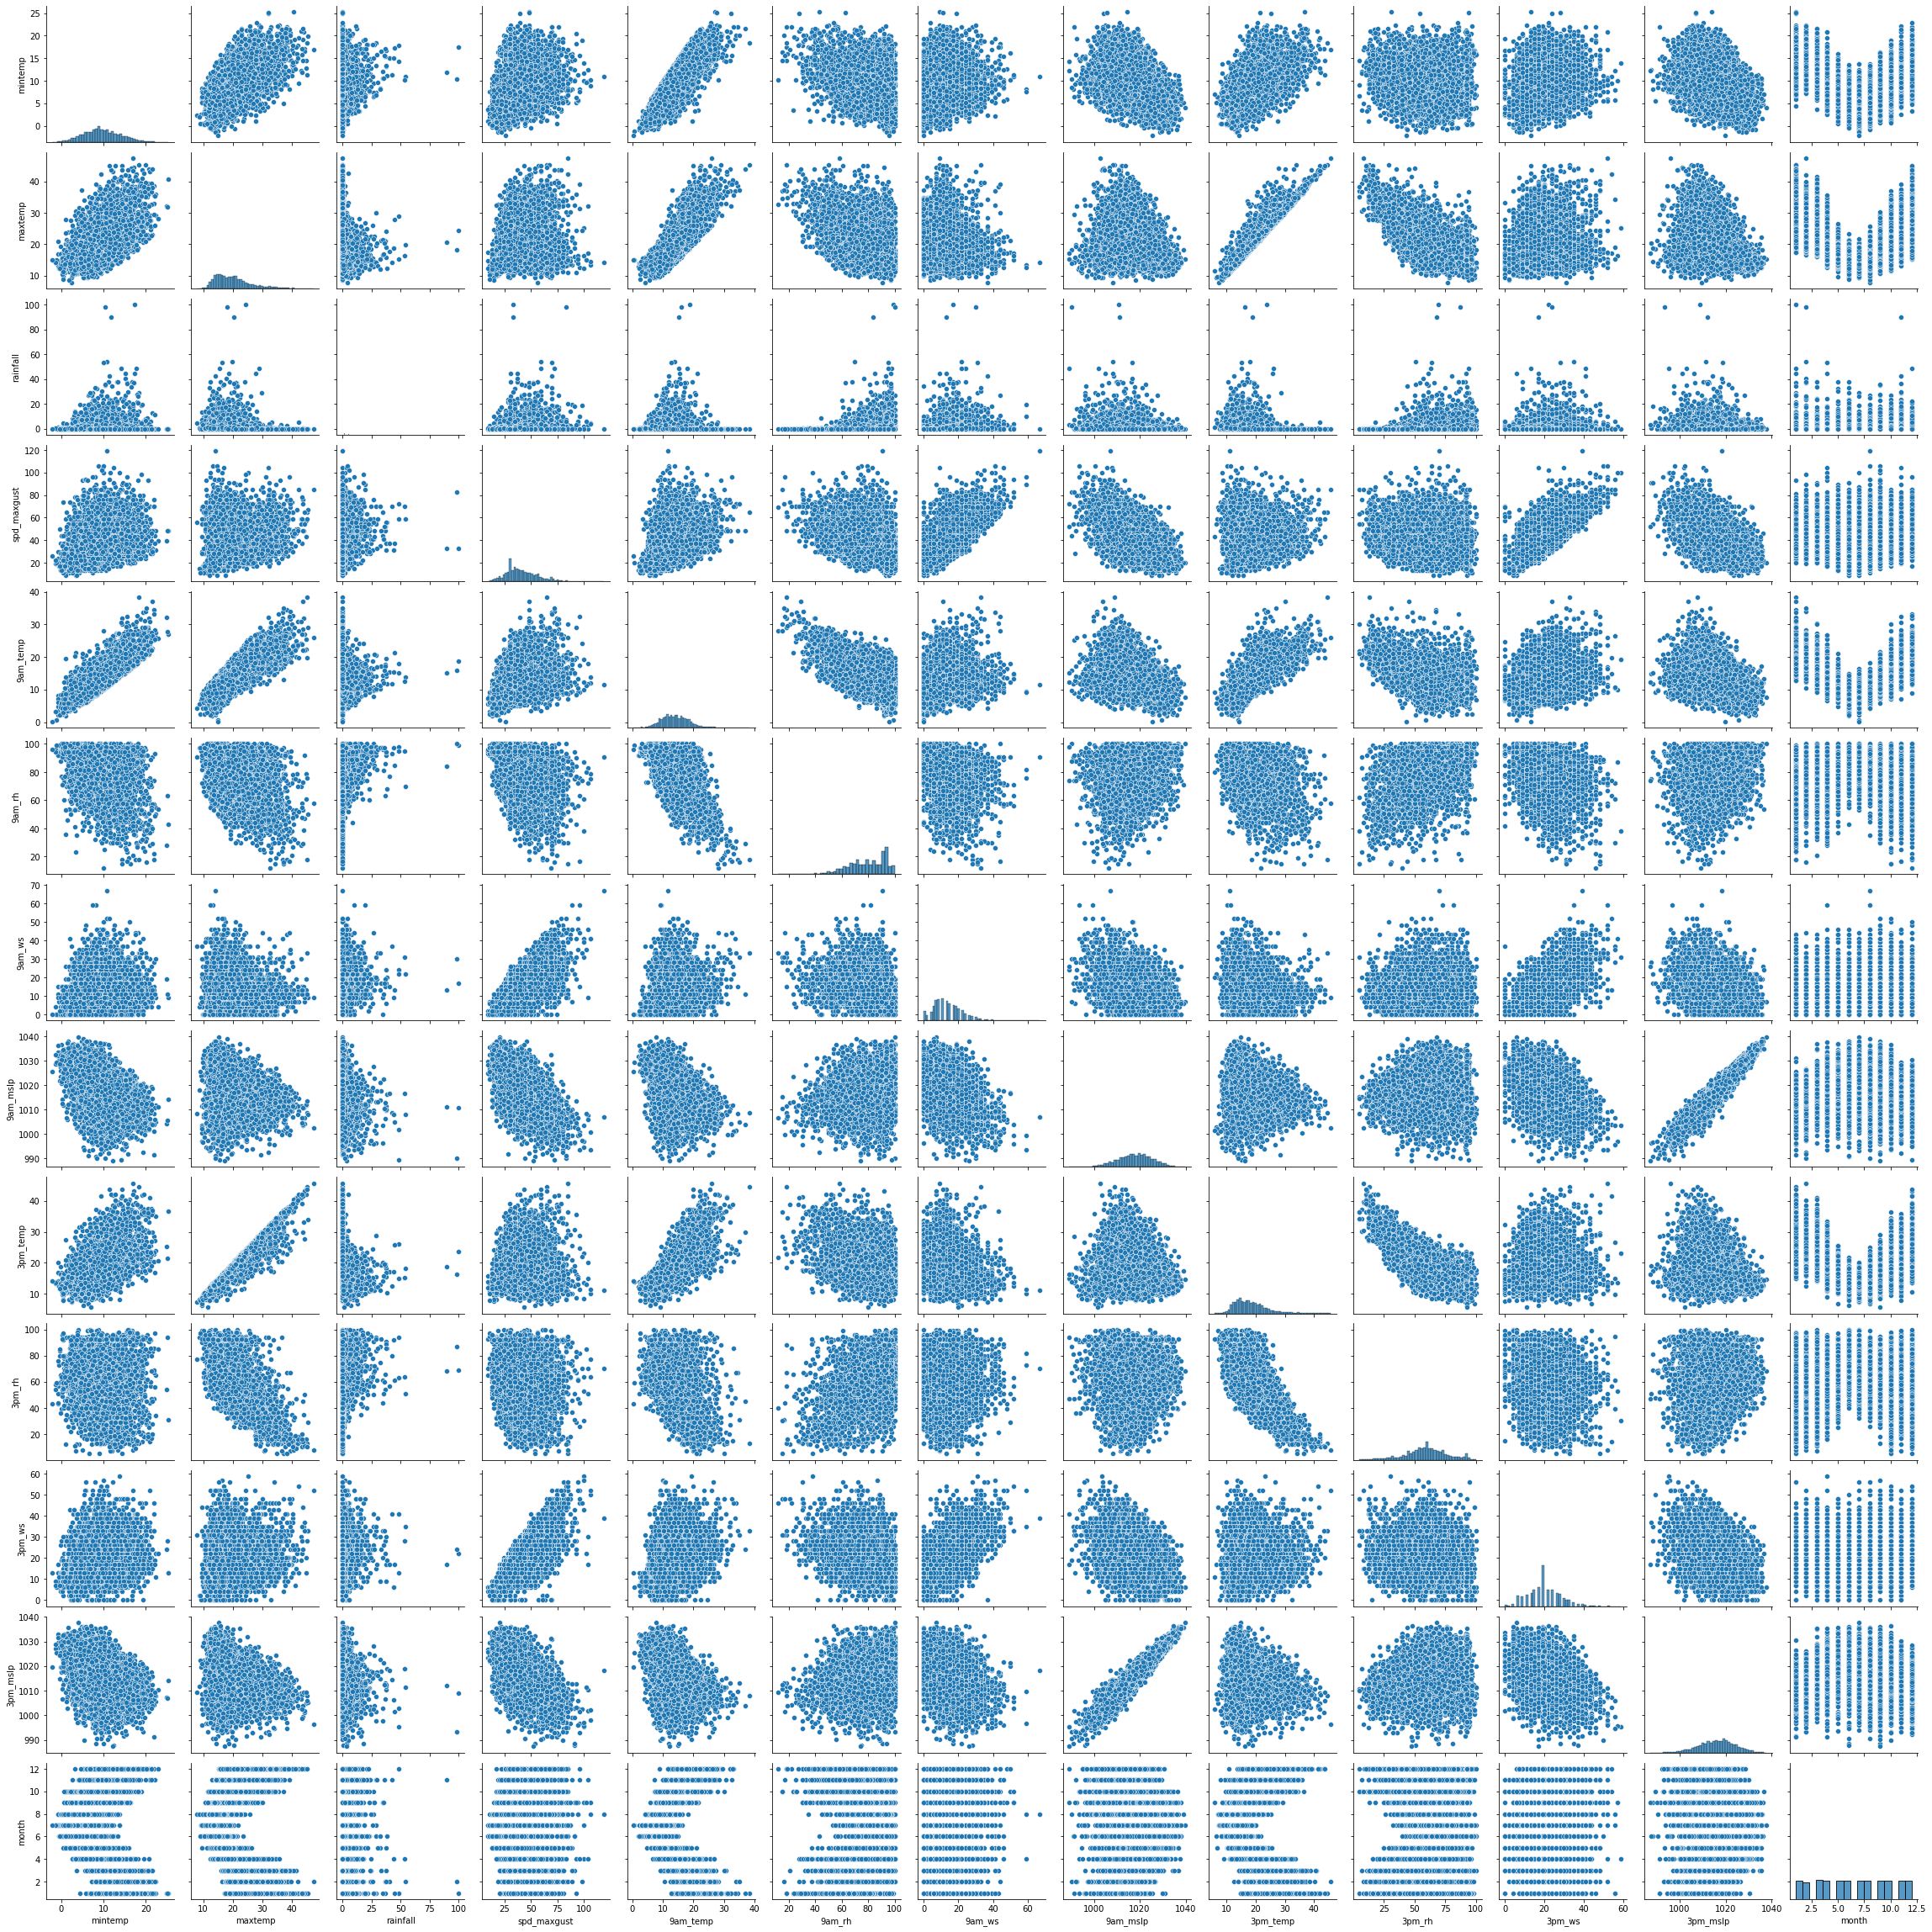

In [10]:
sns.pairplot(dfweather)

min   max       mean  median
month                              
1      4.5  25.3  14.117333   14.10
2      7.2  22.4  14.370921   14.20
3      3.6  21.6  12.766481   12.50
4      2.6  20.8  10.254314   10.00
5      0.5  15.9   8.320683    8.50
6     -0.5  13.5   6.284843    6.35
7     -2.2  13.8   6.020493    6.30
8     -0.8  13.8   6.251992    6.30
9      0.7  16.4   7.310980    7.35
10     0.6  19.0   8.509905    8.50
11     2.6  22.1  10.747327   10.60
12     3.3  22.9  12.014476   11.70

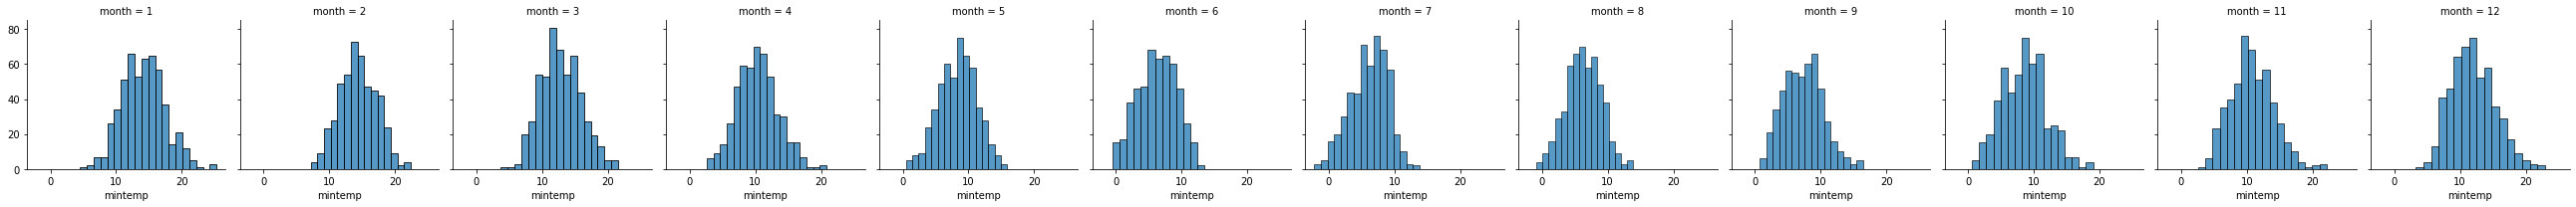

In [11]:
'''
Looking at the mintemp column, it might make sense to fill null values with some measure of the average for the current month to attempt to account for any monthly seasonal variation.

Table shows that thre is only a small difference in mean and median temperatures for a month, mintemp distributions by month look like they might suggest median a better fit.

Another way to look at this would be to explore the relationship between min/max temp and 9am/3pm temp.

Uncomment the above cell and have a look - it shows some interseting correlations between the temperatures (the multivariate imputers in sklearn would likely take these correlations into account)
'''

hist_grid = sns.FacetGrid(dfweather, col = 'month')
hist_grid.map(sns.histplot, 'mintemp')

display(dfweather.groupby('month')['mintemp'].agg(['min', 'max', 'mean', 'median']))

min   max       mean  median
month                               
1      17.3  45.4  25.904432   23.80
2      16.5  47.4  25.062917   23.85
3      16.1  41.5  23.982841   22.60
4      12.5  35.7  20.813807   19.90
5       9.6  26.4  17.335361   16.85
6       8.9  23.4  14.542633   14.50
7       9.3  21.8  14.195627   14.00
8       7.9  25.8  15.165779   14.70
9      10.8  30.2  17.411569   16.60
10     11.6  37.1  20.119772   18.50
11     13.0  39.2  22.177953   20.40
12     15.2  45.1  24.240762   22.60

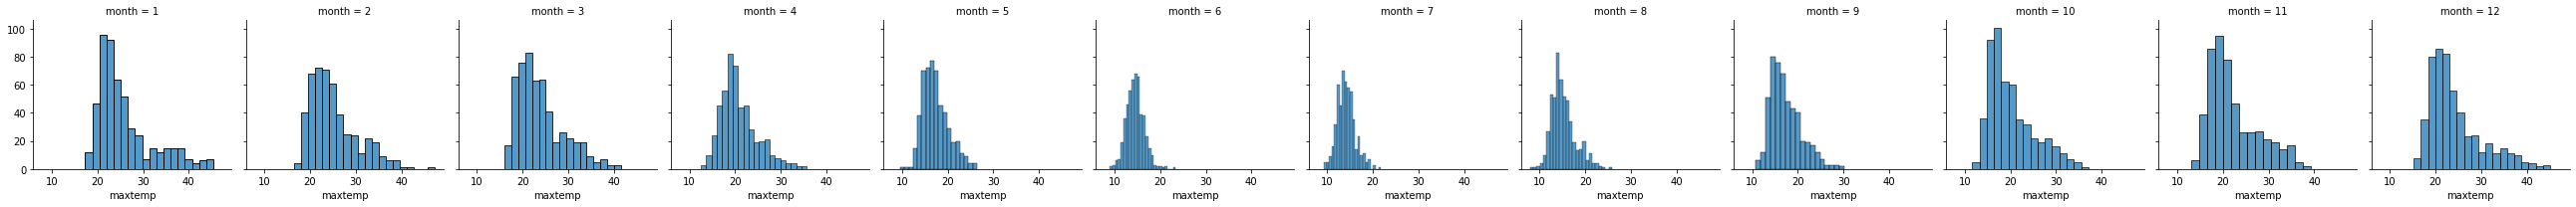

In [12]:
'''
Distributions by month for maxtemp suggest median maxtemp is a better fit for missing values
'''
hist_grid = sns.FacetGrid(dfweather, col = 'month')
hist_grid.map(sns.histplot, 'maxtemp')

display(dfweather.groupby('month')['maxtemp'].agg(['min', 'max', 'mean', 'median']))

min   max       mean  median
month                               
1      12.7  38.3  19.196762   18.30
2      10.4  35.0  18.270711   18.10
3       9.1  30.5  16.586296   16.20
4       6.7  26.8  14.976275   14.70
5       4.7  21.0  11.937072   11.85
6       1.9  14.8   9.214764    9.40
7       0.2  16.4   8.984411    9.20
8       4.2  18.3   9.965275    9.90
9       5.9  21.6  12.341176   12.00
10      7.2  30.2  13.966224   13.30
11      7.1  32.5  16.053057   15.20
12      8.9  33.2  17.706844   17.05

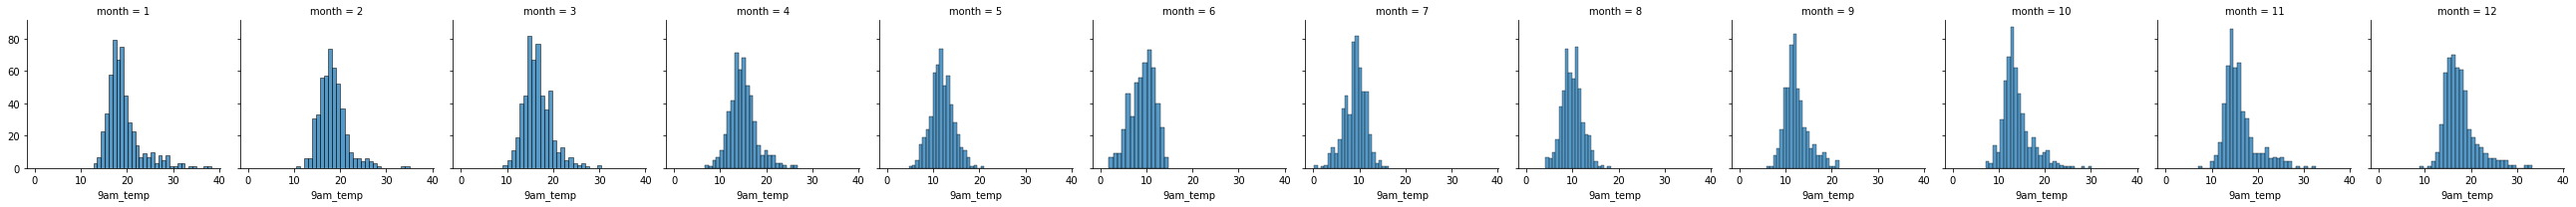

In [13]:
hist_grid = sns.FacetGrid(dfweather, col = 'month')
hist_grid.map(sns.histplot, '9am_temp')

display(dfweather.groupby('month')['9am_temp'].agg(['min', 'max', 'mean', 'median']))

min   max       mean  median
month                               
1      14.9  44.5  23.639771   22.00
2      12.5  45.7  23.111042   22.00
3      14.1  40.9  22.312362   21.10
4       9.1  33.5  19.244597   18.30
5       6.8  25.6  16.029981   15.50
6       6.4  21.8  13.471709   13.50
7       7.3  20.0  13.024478   12.90
8       6.9  25.1  13.869450   13.40
9       5.7  29.2  15.781373   15.05
10      9.5  36.4  18.351613   16.80
11      7.8  35.9  20.074213   18.55
12     10.6  43.8  21.934791   20.50

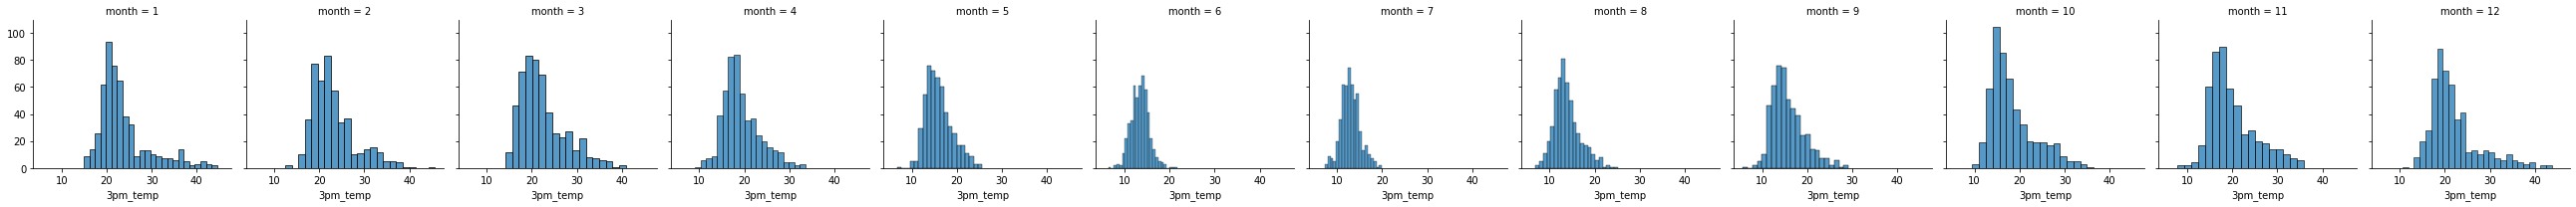

In [14]:
hist_grid = sns.FacetGrid(dfweather, col = 'month')
hist_grid.map(sns.histplot, '3pm_temp')
display(dfweather.groupby('month')['3pm_temp'].agg(['min', 'max', 'mean', 'median']))

In [15]:
'''
From all of the above plots for the different temperature, it looks like the median temperature for the month might be a better fit to replace null values in each of the temperature features
'''

temp_cols = ['mintemp', 'maxtemp', '9am_temp', '3pm_temp']

for col in temp_cols:
    dfweather[col] = dfweather[col].fillna(dfweather.groupby('month')[col].transform('median'))

dfweather[dfweather.isna().any(axis = 1)].info()
display(dfweather[dfweather.isna().any(axis = 1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 75 to 6215
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          156 non-null    datetime64[ns]
 1   mintemp       156 non-null    float64       
 2   maxtemp       156 non-null    float64       
 3   rainfall      110 non-null    float64       
 4   dir_maxgust   108 non-null    object        
 5   spd_maxgust   108 non-null    float64       
 6   time_maxgust  108 non-null    object        
 7   9am_temp      156 non-null    float64       
 8   9am_rh        106 non-null    float64       
 9   9am_wd        156 non-null    object        
 10  9am_ws        156 non-null    float64       
 11  9am_mslp      145 non-null    float64       
 12  3pm_temp      156 non-null    float64       
 13  3pm_rh        136 non-null    float64       
 14  3pm_wd        156 non-null    object        
 15  3pm_ws        156 non-null    float64 

date  mintemp  maxtemp  rainfall dir_maxgust  spd_maxgust  \
75   2004-05-15      7.6     20.7       0.0         NaN          NaN   
76   2004-05-16      9.9     16.8       NaN           W         65.0   
121  2004-06-30     10.7     13.2       NaN         WSW         76.0   
131  2004-07-10      8.7     16.4       0.0           N         44.0   
242  2004-10-29     10.2     14.7       NaN           S         33.0   
...         ...      ...      ...       ...         ...          ...   
6069 2020-10-12      4.4     24.3       0.0         NaN          NaN   
6078 2020-10-21      7.5     17.0       0.0         NaN          NaN   
6209 2021-03-01     12.4     23.9       NaN          SW         48.0   
6210 2021-03-02     12.5     17.9       0.4           S         41.0   
6215 2021-03-07      8.9     27.1       0.0         NaN          NaN   

     time_maxgust  9am_temp  9am_rh 9am_wd  9am_ws  9am_mslp  3pm_temp  \
75            NaT     11.40    83.0      N     9.0    1012.2      19.7   
76       13:26:00     11.85     NaN   Calm     0.0    1012.4      13.5   
121      16:11:00     12.00    71.0     NW    39.0    1003.4      11.0   
131      12:53:00     10.20    74.0    NNE    15.0    1020.8      15.3   
242      09:17:00     12.00    64.0      S    22.0    1029.7      13.3   
...           ...       ...     ...    ...     ...       ...       ...   
6069          NaT     11.80    82.0    NNE    11.0    1021.7      21.5   
6078          NaT     13.60    78.0     SW     6.0    1017.1      15.1   
6209     15:25:00     16.10    83.0      W    15.0    1012.0      21.9   
6210     10:26:00     16.20     NaN    WSW    11.0    1018.5      16.4   
6215          NaT     12.60    92.0    WSW     2.0    1011.7      23.9   

      3pm_rh 3pm_wd  3pm_ws  3pm_mslp  month  
75      41.0     NW    26.0    1008.0      5  
76      81.0      W    24.0    1013.6      5  
121     75.0     NW    33.0    1002.5      6  
131     45.0      N    24.0       NaN      7  
242     67.0    SSE    22.0    1028.0     10  
...      ...    ...     ...       ...    ...  
6069     NaN     NE    11.0    1018.0     10  
6078    73.0      S    20.0    1016.2     10  
6209    39.0    WSW    28.0    1012.5      3  
6210    50.0    SSW    22.0    1019.2      3  
6215    56.0      S    22.0    1008.4      3  

[156 rows x 18 columns]

Results for 9am_rh:


min    max       mean  median
month                                
1      18.0   99.0  69.664762    69.0
2      16.0  100.0  76.512552    76.5
3      21.0  100.0  78.745318    81.0
4      28.0  100.0  79.845545    83.0
5      37.0  100.0  85.445507    89.0
6      43.0  100.0  89.148893    92.0
7      53.0  100.0  86.928433    91.0
8      35.0  100.0  83.438330    86.0
9      30.0  100.0  77.200000    79.0
10     15.0  100.0  74.591255    77.0
11     17.0  100.0  73.110454    73.0
12     12.0  100.0  68.760000    68.0

Results for 3pm_rh:


min    max       mean  median
month                                
1       5.0   98.0  52.579350    54.0
2       8.0   98.0  55.250000    56.0
3       7.0  100.0  53.097015    53.0
4      16.0   96.0  57.529528    58.0
5      25.0   97.0  64.745731    65.0
6      40.0  100.0  72.216110    71.0
7      32.0  100.0  69.366224    69.0
8      26.0   99.0  64.916509    64.0
9      13.0   95.0  60.921569    60.0
10      5.0   98.0  55.536260    57.0
11      7.0   99.0  56.710630    57.0
12      5.0  100.0  52.678095    53.0

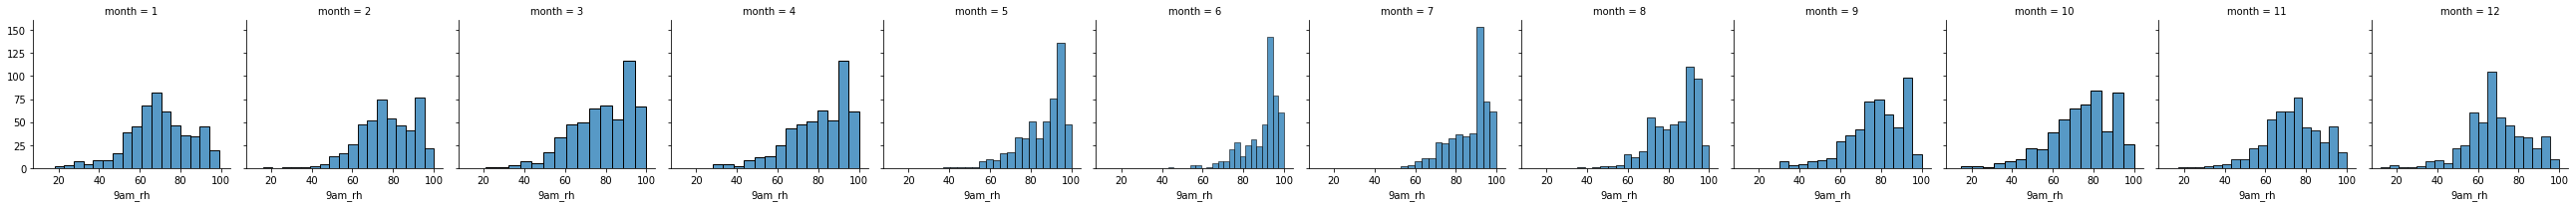

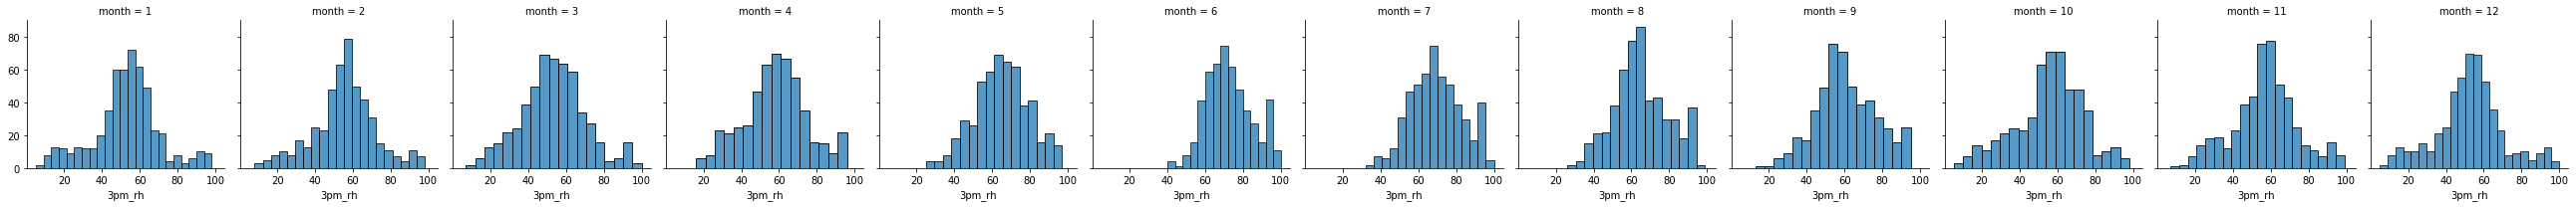

In [16]:
'''
Going to look at the relative humidity columns next.

There are 20 missing values in each of the 9am_rh and the 3pm_rh columns.

Again, from the reports below, it looks there is a definite skew to the monthly distributions for the humidity data, going to replace the missing values with the median for the relevant month
'''

rh_cols = ['9am_rh', '3pm_rh']

for rh_col in rh_cols:
    hist_grid = sns.FacetGrid(dfweather, col = 'month')
    hist_grid.map(sns.histplot, rh_col)
    print('Results for {}:'.format(rh_col))
    display(dfweather.groupby('month')[rh_col].agg(['min', 'max', 'mean', 'median']))

In [17]:
for rh_col in rh_cols:
    dfweather[rh_col] = dfweather[rh_col].fillna(dfweather.groupby('month')[rh_col].transform('median'))

dfweather[dfweather.isna().any(axis = 1)].info()
display(dfweather[dfweather.isna().any(axis = 1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 75 to 6215
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          103 non-null    datetime64[ns]
 1   mintemp       103 non-null    float64       
 2   maxtemp       103 non-null    float64       
 3   rainfall      57 non-null     float64       
 4   dir_maxgust   55 non-null     object        
 5   spd_maxgust   55 non-null     float64       
 6   time_maxgust  55 non-null     object        
 7   9am_temp      103 non-null    float64       
 8   9am_rh        103 non-null    float64       
 9   9am_wd        103 non-null    object        
 10  9am_ws        103 non-null    float64       
 11  9am_mslp      92 non-null     float64       
 12  3pm_temp      103 non-null    float64       
 13  3pm_rh        103 non-null    float64       
 14  3pm_wd        103 non-null    object        
 15  3pm_ws        103 non-null    float64 

date  mintemp  maxtemp  rainfall dir_maxgust  spd_maxgust  \
75   2004-05-15      7.6     20.7       0.0         NaN          NaN   
76   2004-05-16      9.9     16.8       NaN           W         65.0   
121  2004-06-30     10.7     13.2       NaN         WSW         76.0   
131  2004-07-10      8.7     16.4       0.0           N         44.0   
242  2004-10-29     10.2     14.7       NaN           S         33.0   
...         ...      ...      ...       ...         ...          ...   
6062 2020-10-05      8.2     14.5      12.8         NaN          NaN   
6069 2020-10-12      4.4     24.3       0.0         NaN          NaN   
6078 2020-10-21      7.5     17.0       0.0         NaN          NaN   
6209 2021-03-01     12.4     23.9       NaN          SW         48.0   
6215 2021-03-07      8.9     27.1       0.0         NaN          NaN   

     time_maxgust  9am_temp  9am_rh 9am_wd  9am_ws  9am_mslp  3pm_temp  \
75            NaT     11.40    83.0      N     9.0    1012.2      19.7   
76       13:26:00     11.85    89.0   Calm     0.0    1012.4      13.5   
121      16:11:00     12.00    71.0     NW    39.0    1003.4      11.0   
131      12:53:00     10.20    74.0    NNE    15.0    1020.8      15.3   
242      09:17:00     12.00    64.0      S    22.0    1029.7      13.3   
...           ...       ...     ...    ...     ...       ...       ...   
6062          NaT      8.90    95.0    SSW    13.0    1019.2      14.1   
6069          NaT     11.80    82.0    NNE    11.0    1021.7      21.5   
6078          NaT     13.60    78.0     SW     6.0    1017.1      15.1   
6209     15:25:00     16.10    83.0      W    15.0    1012.0      21.9   
6215          NaT     12.60    92.0    WSW     2.0    1011.7      23.9   

      3pm_rh 3pm_wd  3pm_ws  3pm_mslp  month  
75      41.0     NW    26.0    1008.0      5  
76      81.0      W    24.0    1013.6      5  
121     75.0     NW    33.0    1002.5      6  
131     45.0      N    24.0       NaN      7  
242     67.0    SSE    22.0    1028.0     10  
...      ...    ...     ...       ...    ...  
6062    63.0    SSE    19.0    1021.8     10  
6069    57.0     NE    11.0    1018.0     10  
6078    73.0      S    20.0    1016.2     10  
6209    39.0    WSW    28.0    1012.5      3  
6215    56.0      S    22.0    1008.4      3  

[103 rows x 18 columns]

min    max      mean  median
month                              
1      0.0  100.0  1.440762     0.0
2      0.0   98.0  1.309167     0.0
3      0.0   37.4  0.846097     0.0
4      0.0   53.6  1.239921     0.0
5      0.0   37.8  1.360077     0.0
6      0.0   38.0  1.606324     0.2
7      0.0   29.0  1.436329     0.2
8      0.0   26.8  1.511027     0.2
9      0.0   35.4  1.654832     0.2
10     0.0   26.8  1.158382     0.0
11     0.0   89.8  1.842629     0.0
12     0.0   48.4  1.072000     0.0

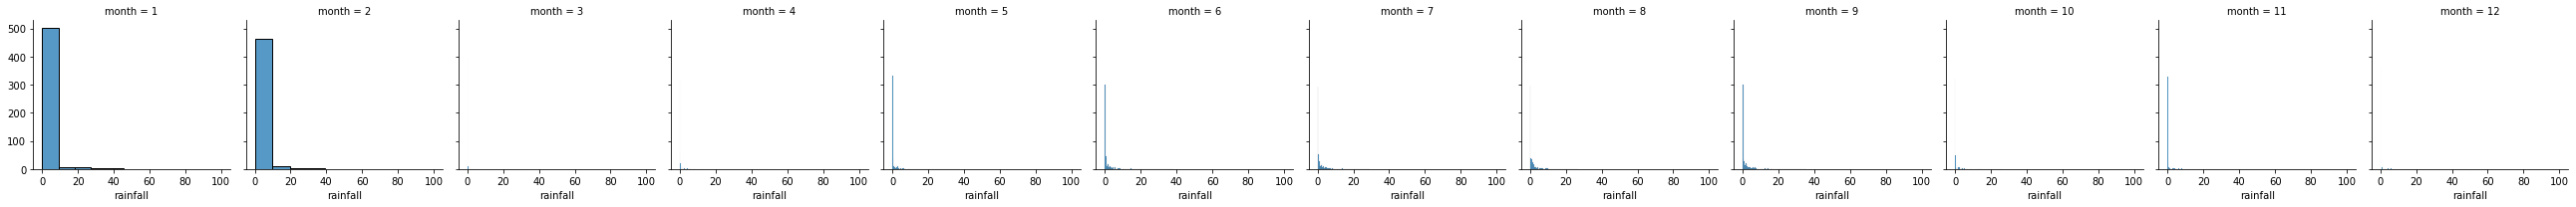

In [18]:
hist_grid = sns.FacetGrid(dfweather, col = 'month')
hist_grid.map(sns.histplot, 'rainfall')
display(dfweather.groupby('month')['rainfall'].agg(['min', 'max', 'mean', 'median']))

In [19]:
dfweather['rainfall'] = dfweather['rainfall'].fillna(dfweather.groupby('month')['rainfall'].transform('median'))

dfweather[dfweather.isna().any(axis = 1)].info()
display(dfweather[dfweather.isna().any(axis = 1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 75 to 6215
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          62 non-null     datetime64[ns]
 1   mintemp       62 non-null     float64       
 2   maxtemp       62 non-null     float64       
 3   rainfall      62 non-null     float64       
 4   dir_maxgust   14 non-null     object        
 5   spd_maxgust   14 non-null     float64       
 6   time_maxgust  14 non-null     object        
 7   9am_temp      62 non-null     float64       
 8   9am_rh        62 non-null     float64       
 9   9am_wd        62 non-null     object        
 10  9am_ws        62 non-null     float64       
 11  9am_mslp      51 non-null     float64       
 12  3pm_temp      62 non-null     float64       
 13  3pm_rh        62 non-null     float64       
 14  3pm_wd        62 non-null     object        
 15  3pm_ws        62 non-null     float64  

date  mintemp  maxtemp  rainfall dir_maxgust  spd_maxgust  \
75   2004-05-15      7.6     20.7       0.0         NaN          NaN   
131  2004-07-10      8.7     16.4       0.0           N         44.0   
314  2005-01-09     13.3     23.8       0.0         NaN          NaN   
338  2005-02-02     10.1     16.5      23.6         NaN          NaN   
415  2005-04-20      7.9     18.8       0.0         NaN          NaN   
...         ...      ...      ...       ...         ...          ...   
6055 2020-09-28      2.1     13.9       0.2         NaN          NaN   
6062 2020-10-05      8.2     14.5      12.8         NaN          NaN   
6069 2020-10-12      4.4     24.3       0.0         NaN          NaN   
6078 2020-10-21      7.5     17.0       0.0         NaN          NaN   
6215 2021-03-07      8.9     27.1       0.0         NaN          NaN   

     time_maxgust  9am_temp  9am_rh 9am_wd  9am_ws  9am_mslp  3pm_temp  \
75            NaT      11.4    83.0      N     9.0    1012.2      19.7   
131      12:53:00      10.2    74.0    NNE    15.0    1020.8      15.3   
314           NaT      16.2    72.0    ESE    17.0    1021.8      21.7   
338           NaT      10.4    98.0      N     4.0    1005.3      12.5   
415           NaT      12.7    99.0      W    20.0    1029.6      16.5   
...           ...       ...     ...    ...     ...       ...       ...   
6055          NaT      10.0    74.0      W     4.0    1029.7      12.4   
6062          NaT       8.9    95.0    SSW    13.0    1019.2      14.1   
6069          NaT      11.8    82.0    NNE    11.0    1021.7      21.5   
6078          NaT      13.6    78.0     SW     6.0    1017.1      15.1   
6215          NaT      12.6    92.0    WSW     2.0    1011.7      23.9   

      3pm_rh 3pm_wd  3pm_ws  3pm_mslp  month  
75      41.0     NW    26.0    1008.0      5  
131     45.0      N    24.0       NaN      7  
314     56.0    SSE    24.0    1020.3      1  
338     96.0      S    22.0    1003.5      2  
415     75.0      S    17.0    1028.6      4  
...      ...    ...     ...       ...    ...  
6055    63.0    SSE    11.0    1026.9      9  
6062    63.0    SSE    19.0    1021.8     10  
6069    57.0     NE    11.0    1018.0     10  
6078    73.0      S    20.0    1016.2     10  
6215    56.0      S    22.0    1008.4      3  

[62 rows x 18 columns]

Results for 9am_mslp:


min     max         mean   median
month                                     
1      991.5  1031.0  1013.673814  1014.10
2      990.1  1026.6  1015.559375  1016.05
3      996.2  1037.0  1017.895556  1018.65
4      993.5  1037.5  1020.455315  1021.45
5      994.8  1037.0  1020.667742  1021.40
6      990.9  1038.0  1021.754832  1023.10
7      993.1  1039.8  1020.002091  1020.90
8      990.1  1038.9  1018.254839  1018.90
9      989.1  1038.0  1017.458350  1017.70
10     993.7  1036.5  1017.897913  1018.60
11     992.1  1029.5  1015.459136  1015.90
12     989.3  1030.5  1013.736692  1014.35

Results for 3pm_mslp:


min     max         mean   median
month                                     
1      991.3  1030.5  1012.464896  1012.70
2      993.3  1026.2  1014.454583  1014.90
3      997.3  1035.3  1016.573013  1017.10
4      991.3  1035.3  1018.514961  1019.50
5      993.6  1035.6  1018.872676  1019.60
6      987.9  1036.1  1020.022835  1021.35
7      993.9  1037.7  1018.217681  1019.40
8      990.7  1035.8  1016.441176  1017.40
9      987.4  1036.1  1015.540588  1016.10
10     989.8  1036.4  1016.361860  1016.90
11     993.3  1030.1  1014.179371  1014.70
12     992.4  1028.6  1012.448479  1012.80

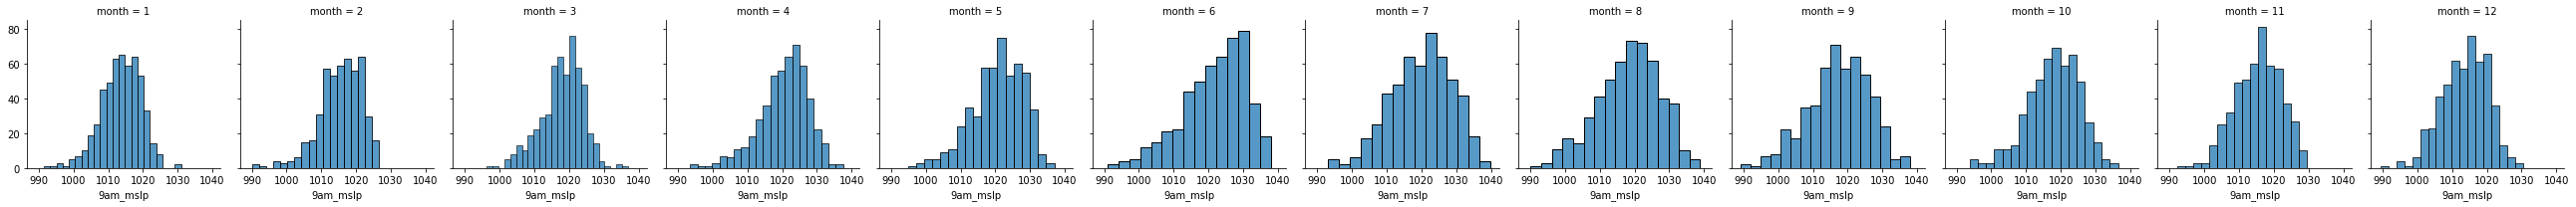

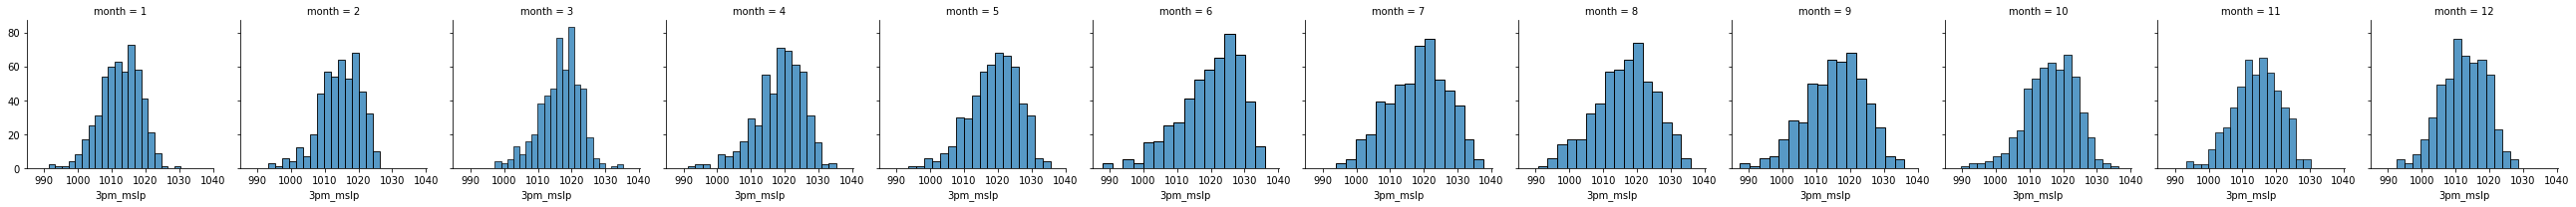

In [20]:
mslp_cols = ['9am_mslp', '3pm_mslp']

for mslp_col in mslp_cols:
    hist_grid = sns.FacetGrid(dfweather, col = 'month')
    hist_grid.map(sns.histplot, mslp_col)
    print('Results for {}:'.format(mslp_col))
    display(dfweather.groupby('month')[mslp_col].agg(['min', 'max', 'mean', 'median']))

In [21]:
for mslp_col in mslp_cols:
    dfweather[mslp_col] = dfweather[mslp_col].fillna(dfweather.groupby('month')[mslp_col].transform('median'))

dfweather[dfweather.isna().any(axis = 1)].info()
display(dfweather[dfweather.isna().any(axis = 1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 75 to 6215
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          49 non-null     datetime64[ns]
 1   mintemp       49 non-null     float64       
 2   maxtemp       49 non-null     float64       
 3   rainfall      49 non-null     float64       
 4   dir_maxgust   1 non-null      object        
 5   spd_maxgust   1 non-null      float64       
 6   time_maxgust  1 non-null      object        
 7   9am_temp      49 non-null     float64       
 8   9am_rh        49 non-null     float64       
 9   9am_wd        49 non-null     object        
 10  9am_ws        49 non-null     float64       
 11  9am_mslp      49 non-null     float64       
 12  3pm_temp      49 non-null     float64       
 13  3pm_rh        49 non-null     float64       
 14  3pm_wd        49 non-null     object        
 15  3pm_ws        49 non-null     float64  

date  mintemp  maxtemp  rainfall dir_maxgust  spd_maxgust  \
75   2004-05-15     7.60    20.70       0.0         NaN          NaN   
314  2005-01-09    13.30    23.80       0.0         NaN          NaN   
338  2005-02-02    10.10    16.50      23.6         NaN          NaN   
415  2005-04-20     7.90    18.80       0.0         NaN          NaN   
416  2005-04-21     6.00    23.60       0.2         NaN          NaN   
421  2005-04-26     7.20    19.00       0.0         NaN          NaN   
913  2006-08-31     2.30    14.70       0.0         NaN          NaN   
2648 2011-06-01     6.35    14.50       0.2         NaN          NaN   
2649 2011-06-02     6.35    20.00       0.2         NaN          NaN   
2802 2011-11-02    11.90    15.20       0.0         NaN          NaN   
2803 2011-11-03     8.70    18.00       0.0         NaN          NaN   
2907 2012-02-15    13.50    34.30       0.0         NaN          NaN   
2989 2012-05-07     8.00    18.10       0.0         NaN          NaN   
3270 2013-02-12    15.00    24.00       0.0         NaN          NaN   
3319 2013-04-02    11.20    20.00       0.0         NaN          NaN   
3659 2014-03-08    14.80    23.90       0.0         NaN          NaN   
3697 2014-04-15    10.40    19.90       0.0         NaN          NaN   
3870 2014-10-05    11.90    18.60       0.0         WSW         33.0   
3990 2015-02-02    14.10    20.40       2.0         NaN          NaN   
3991 2015-02-03    14.60    21.40       0.0         NaN          NaN   
4058 2015-04-11     9.70    22.20       0.0         NaN          NaN   
4072 2015-04-25    11.00    15.60       2.2         NaN          NaN   
4081 2015-05-04     6.60    22.60       0.0         NaN          NaN   
4095 2015-05-18     4.60    19.50       0.0         NaN          NaN   
4144 2015-07-06     9.40    12.40       0.0         NaN          NaN   
4195 2015-08-26     9.40    14.40       0.2         NaN          NaN   
4203 2015-09-03    10.20    14.20       6.6         NaN          NaN   
4212 2015-09-12    10.80    24.30       0.0         NaN          NaN   
4219 2015-09-19     4.10    18.50       0.4         NaN          NaN   
4230 2015-09-30     8.70    16.10       0.2         NaN          NaN   
4236 2015-10-06    16.30    34.50       0.0         NaN          NaN   
4237 2015-10-07     7.10    15.80       0.0         NaN          NaN   
4238 2015-10-08     5.40    18.50       0.0         NaN          NaN   
4245 2015-10-15    11.40    34.80       0.0         NaN          NaN   
4259 2015-10-29    12.40    23.10       0.0         NaN          NaN   
4267 2015-11-06    15.50    21.30       4.4         NaN          NaN   
4285 2015-11-24     9.80    26.90       0.0         NaN          NaN   
5194 2018-05-21    11.40    16.85       5.0         NaN          NaN   
5204 2018-05-31     7.70    14.50       8.0         NaN          NaN   
5360 2018-11-03    10.60    20.20       1.6         NaN          NaN   
5766 2019-12-14    11.70    21.60       0.0         NaN          NaN   
5909 2020-05-05     7.70    19.00       1.0         NaN          NaN   
5996 2020-07-31     1.60    16.10       0.2         NaN          NaN   
6006 2020-08-10     4.30    15.30       0.2         NaN          NaN   
6055 2020-09-28     2.10    13.90       0.2         NaN          NaN   
6062 2020-10-05     8.20    14.50      12.8         NaN          NaN   
6069 2020-10-12     4.40    24.30       0.0         NaN          NaN   
6078 2020-10-21     7.50    17.00       0.0         NaN          NaN   
6215 2021-03-07     8.90    27.10       0.0         NaN          NaN   

     time_maxgust  9am_temp  9am_rh 9am_wd  9am_ws  9am_mslp  3pm_temp  \
75            NaT      11.4    83.0      N     9.0    1012.2      19.7   
314           NaT      16.2    72.0    ESE    17.0    1021.8      21.7   
338           NaT      10.4    98.0      N     4.0    1005.3      12.5   
415           NaT      12.7    99.0      W    20.0    1029.6      16.5   
416           NaT      13.9   100.0    N

In [22]:
'''
Not sure how to deal with the reaming missing values in max windspped, dir and time yet..dropping them for now, may come back later
'''
dfweather = dfweather[dfweather['dir_maxgust'].notna()]
dfweather[dfweather.isna().any(axis = 1)].info()
display(dfweather[dfweather.isna().any(axis = 1)])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 3870 to 3870
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1 non-null      datetime64[ns]
 1   mintemp       1 non-null      float64       
 2   maxtemp       1 non-null      float64       
 3   rainfall      1 non-null      float64       
 4   dir_maxgust   1 non-null      object        
 5   spd_maxgust   1 non-null      float64       
 6   time_maxgust  0 non-null      object        
 7   9am_temp      1 non-null      float64       
 8   9am_rh        1 non-null      float64       
 9   9am_wd        1 non-null      object        
 10  9am_ws        1 non-null      float64       
 11  9am_mslp      1 non-null      float64       
 12  3pm_temp      1 non-null      float64       
 13  3pm_rh        1 non-null      float64       
 14  3pm_wd        1 non-null      object        
 15  3pm_ws        1 non-null      float64 

date  mintemp  maxtemp  rainfall dir_maxgust  spd_maxgust  \
3870 2014-10-05     11.9     18.6       0.0         WSW         33.0   

     time_maxgust  9am_temp  9am_rh 9am_wd  9am_ws  9am_mslp  3pm_temp  \
3870          NaT      14.2    61.0      W    11.0    1017.1      17.0   

      3pm_rh 3pm_wd  3pm_ws  3pm_mslp  month  
3870    50.0    SSE    20.0    1017.0     10

In [23]:
dfweather = dfweather[dfweather['time_maxgust'].notna()]
dfweather[dfweather.isna().any(axis = 1)].info()
display(dfweather[dfweather.isna().any(axis = 1)])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          0 non-null      datetime64[ns]
 1   mintemp       0 non-null      float64       
 2   maxtemp       0 non-null      float64       
 3   rainfall      0 non-null      float64       
 4   dir_maxgust   0 non-null      object        
 5   spd_maxgust   0 non-null      float64       
 6   time_maxgust  0 non-null      object        
 7   9am_temp      0 non-null      float64       
 8   9am_rh        0 non-null      float64       
 9   9am_wd        0 non-null      object        
 10  9am_ws        0 non-null      float64       
 11  9am_mslp      0 non-null      float64       
 12  3pm_temp      0 non-null      float64       
 13  3pm_rh        0 non-null      float64       
 14  3pm_wd        0 non-null      object        
 15  3pm_ws        0 non-null      float64       
 16  3p

Empty DataFrame
Columns: [date, mintemp, maxtemp, rainfall, dir_maxgust, spd_maxgust, time_maxgust, 9am_temp, 9am_rh, 9am_wd, 9am_ws, 9am_mslp, 3pm_temp, 3pm_rh, 3pm_wd, 3pm_ws, 3pm_mslp, month]
Index: []

In [24]:
'''
From here, I'll work on the AQ index data
'''

dfaq = pd.read_csv('geelong_aq.csv', encoding = 'ISO-8859-1', parse_dates = ['date'], dayfirst = True)

dfaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2614 non-null   datetime64[ns]
 1   pm25    1929 non-null   float64       
 2   pm10    2531 non-null   float64       
 3   o3      2592 non-null   float64       
 4   no2     2528 non-null   float64       
 5   so2     1215 non-null   float64       
 6   co      1615 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 143.1 KB


In [25]:
dfaq.head()

date  pm25  pm10    o3  no2   so2  co
0 2021-03-01  45.0  17.0  12.0  2.0  13.0 NaN
1 2021-03-02  17.0  14.0  12.0  2.0   NaN NaN
2 2021-03-03   8.0  17.0  11.0  2.0   NaN NaN
3 2021-03-04   9.0  18.0  14.0  2.0   NaN NaN
4 2021-03-05  30.0  23.0  14.0  1.0   NaN NaN

Results for pm25:


min    max       mean  median
month                                
1       8.0  202.0  32.427778    29.0
2       6.0   66.0  25.503497    23.0
3       7.0   68.0  24.640523    23.0
4       1.0   80.0  29.250000    27.0
5       5.0  179.0  30.490066    26.0
6       8.0   84.0  31.000000    26.0
7      10.0   64.0  27.579882    24.0
8       2.0   58.0  23.101124    20.5
9       4.0   42.0  21.416667    21.0
10      8.0   58.0  25.282486    24.0
11      5.0   59.0  24.017143    23.0
12      6.0   77.0  27.488095    25.0

Results for pm10:


min    max       mean  median
month                               
1      3.0  132.0  21.522822    19.0
2      2.0   59.0  19.392694    17.0
3      2.0   71.0  17.932432    17.0
4      5.0   59.0  17.849246    16.0
5      2.0   71.0  15.313364    14.0
6      1.0   42.0  12.572139    11.0
7      1.0   32.0  12.522613    11.0
8      2.0   32.0  12.126168    11.0
9      4.0   36.0  13.740196    13.0
10     4.0   63.0  18.976744    16.0
11     2.0   84.0  18.000000    15.0
12     5.0   65.0  18.365482    17.0

Results for o3:


min   max       mean  median
month                               
1       6.0  78.0  19.548780    16.0
2       5.0  47.0  18.843750    16.0
3       1.0  46.0  18.823009    17.0
4       6.0  34.0  18.480952    18.0
5       5.0  23.0  16.889401    17.0
6       2.0  24.0  15.909091    17.0
7       2.0  25.0  17.598086    18.0
8       5.0  26.0  20.033175    20.0
9       3.0  32.0  20.932039    21.0
10     11.0  38.0  21.645161    21.0
11     12.0  67.0  20.782609    19.0
12      4.0  52.0  19.190476    17.0

Results for no2:


min   max      mean  median
month                             
1      1.0  15.0  3.164502     2.0
2      1.0  11.0  3.351852     3.0
3      1.0  19.0  4.443946     4.0
4      1.0  25.0  5.932692     5.0
5      1.0  18.0  6.898148     6.5
6      1.0  18.0  7.389423     7.0
7      1.0  17.0  6.263158     6.0
8      1.0  16.0  5.725581     5.0
9      1.0  18.0  4.887255     4.0
10     1.0  17.0  4.628713     4.0
11     1.0  11.0  3.558376     3.0
12     1.0   9.0  2.939698     2.0

Results for so2:


min   max      mean  median
month                             
1      1.0  54.0  4.026549     2.0
2      1.0   7.0  1.895349     2.0
3      1.0  21.0  2.710000     2.0
4      1.0   8.0  2.166667     2.0
5      1.0  22.0  2.612903     2.0
6      1.0  10.0  2.336207     2.0
7      1.0  19.0  3.032258     2.0
8      1.0  20.0  2.657143     2.0
9      1.0   8.0  2.090000     2.0
10     1.0   9.0  1.811111     1.0
11     1.0   6.0  1.690141     1.0
12     1.0  47.0  2.821429     2.0

Results for co:


min    max      mean  median
month                              
1      1.0   17.0  1.984615     1.0
2      1.0    7.0  1.467890     1.0
3      1.0    6.0  1.362069     1.0
4      1.0    7.0  1.666667     1.0
5      1.0    7.0  2.052288     2.0
6      1.0    7.0  2.292398     2.0
7      1.0  208.0  7.045161     2.0
8      1.0    6.0  1.770186     1.0
9      1.0    4.0  1.417266     1.0
10     1.0    2.0  1.284615     1.0
11     1.0    2.0  1.155172     1.0
12     1.0    4.0  1.290000     1.0

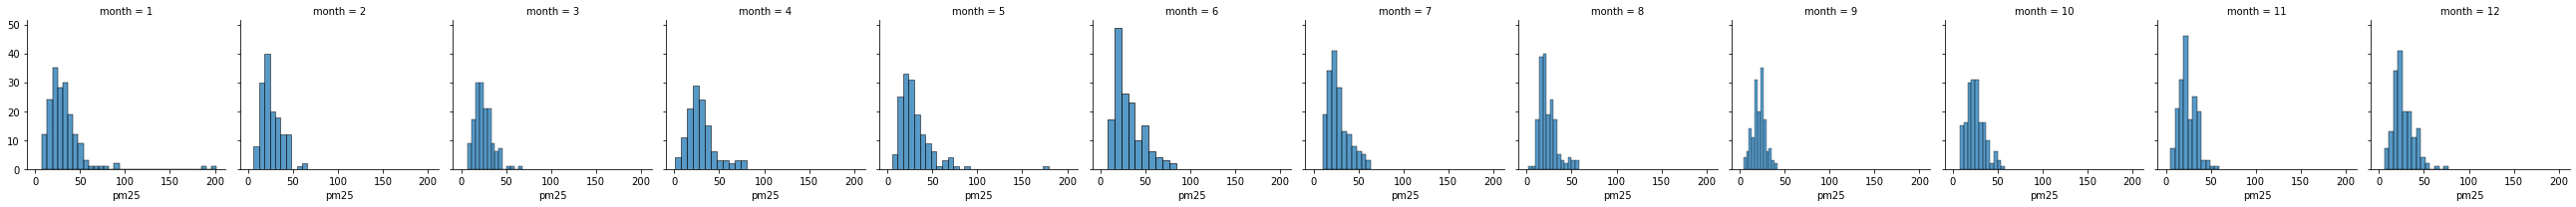

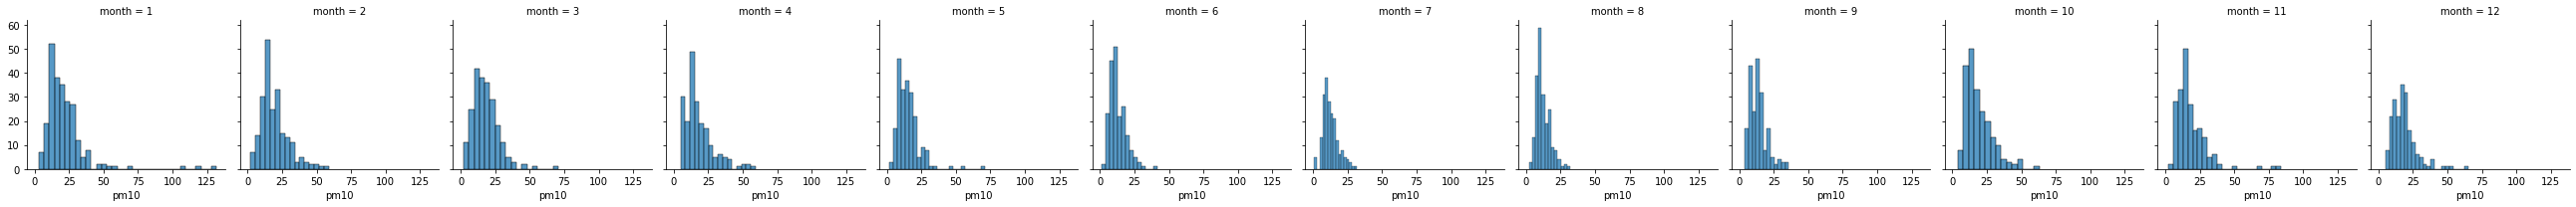

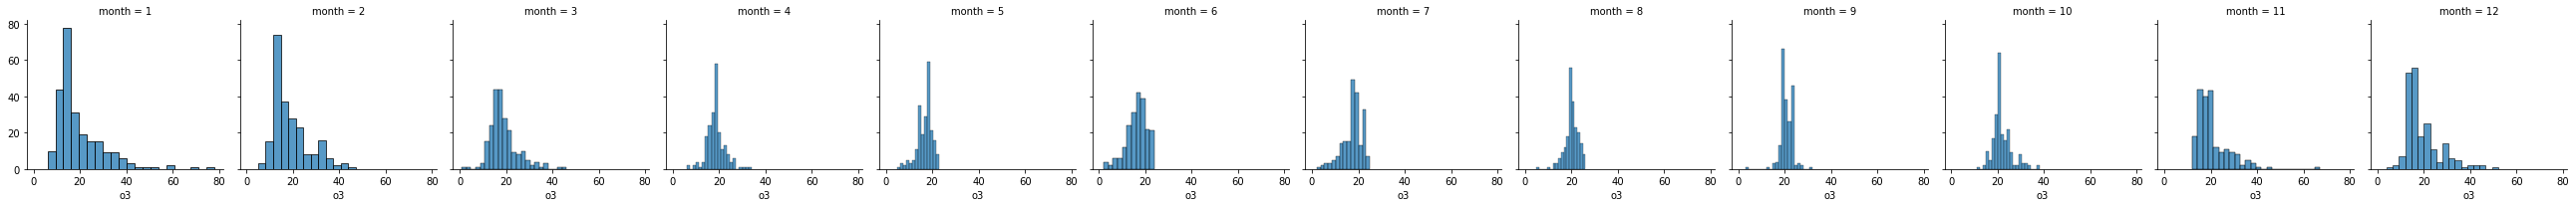

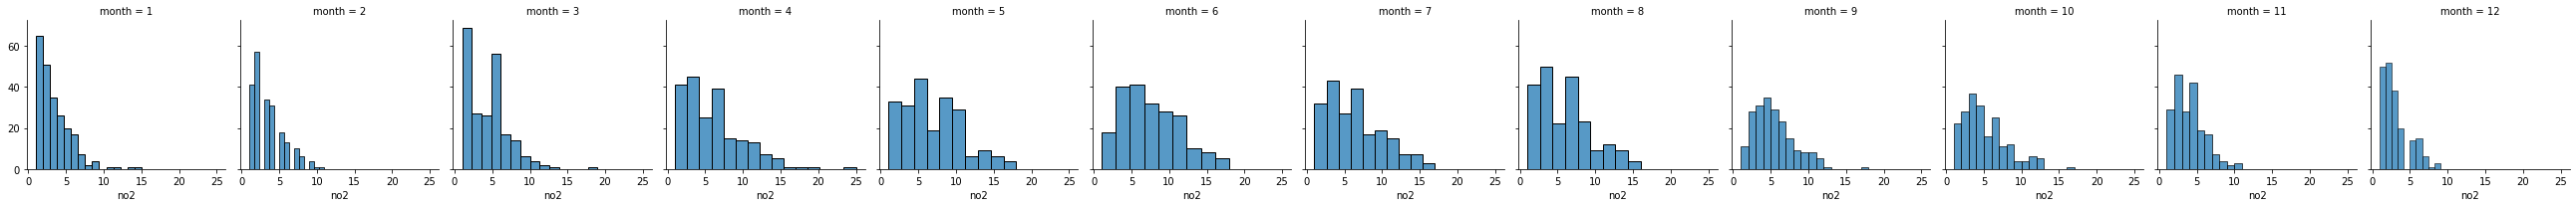

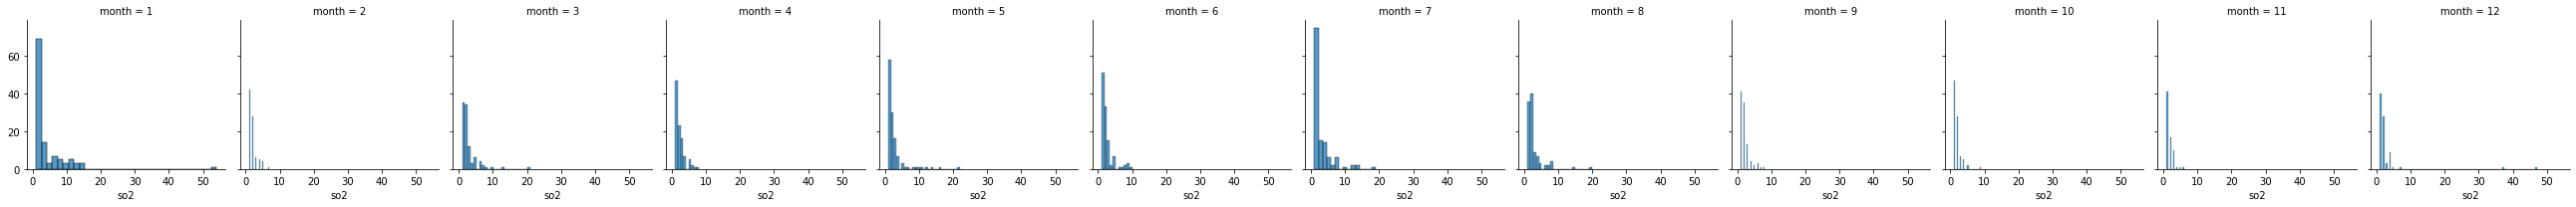

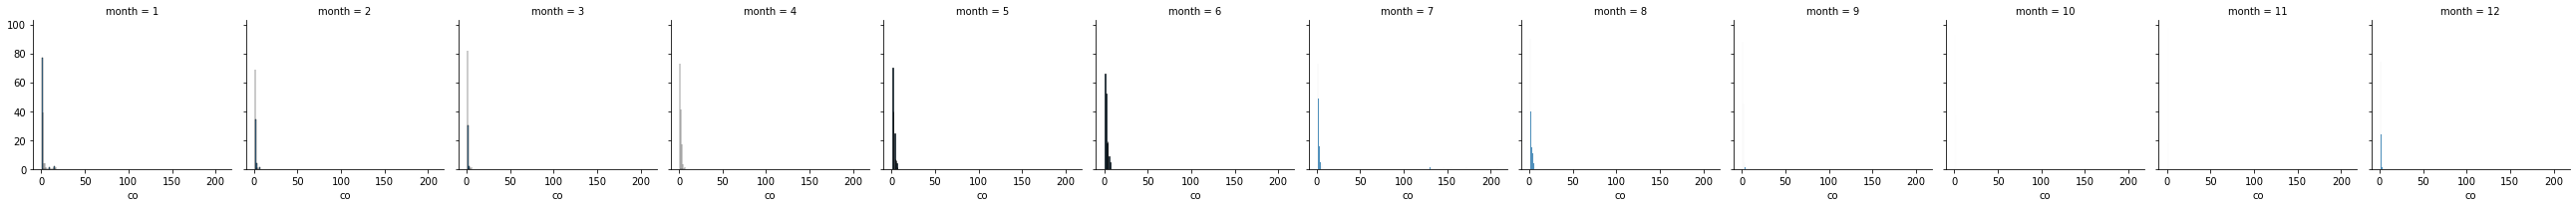

In [26]:
cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
dfaq['month'] = pd.DatetimeIndex(dfaq['date']).month

for col in cols:
    hist_grid = sns.FacetGrid(dfaq, col = 'month')
    hist_grid.map(sns.histplot, col)
    print('Results for {}:'.format(col))
    display(dfaq.groupby('month')[col].agg(['min', 'max', 'mean', 'median']))


In [27]:
'''
replace missing values with monthly median
'''

for col in cols:
    dfaq[col] = dfaq[col].fillna(dfaq.groupby('month')[col].transform('median'))

dfaq[dfaq.isna().any(axis = 1)].info()
display(dfaq[dfaq.isna().any(axis = 1)])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    0 non-null      datetime64[ns]
 1   pm25    0 non-null      float64       
 2   pm10    0 non-null      float64       
 3   o3      0 non-null      float64       
 4   no2     0 non-null      float64       
 5   so2     0 non-null      float64       
 6   co      0 non-null      float64       
 7   month   0 non-null      int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 0.0 bytes


Empty DataFrame
Columns: [date, pm25, pm10, o3, no2, so2, co, month]
Index: []

In [28]:
dfweather.drop('month', inplace = True, axis = 1)
dfaq.drop('month', inplace = True, axis = 1)

In [29]:
dfweatheraq = dfweather.merge(dfaq, left_on = 'date', right_on = 'date')
dfweatheraq.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2581 entries, 0 to 2580
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2581 non-null   datetime64[ns]
 1   mintemp       2581 non-null   float64       
 2   maxtemp       2581 non-null   float64       
 3   rainfall      2581 non-null   float64       
 4   dir_maxgust   2581 non-null   object        
 5   spd_maxgust   2581 non-null   float64       
 6   time_maxgust  2581 non-null   object        
 7   9am_temp      2581 non-null   float64       
 8   9am_rh        2581 non-null   float64       
 9   9am_wd        2581 non-null   object        
 10  9am_ws        2581 non-null   float64       
 11  9am_mslp      2581 non-null   float64       
 12  3pm_temp      2581 non-null   float64       
 13  3pm_rh        2581 non-null   float64       
 14  3pm_wd        2581 non-null   object        
 15  3pm_ws        2581 non-null   float64 

In [30]:
dfweatheraq.head()

date  mintemp  maxtemp  rainfall dir_maxgust  spd_maxgust  \
0 2013-12-31      9.6     22.7       0.0           S         28.0   
1 2014-01-01     12.8     26.0       0.0         NNW         59.0   
2 2014-01-02     12.9     21.4      11.6         WSW         35.0   
3 2014-01-03     11.1     22.3       0.2         WSW         50.0   
4 2014-01-04     11.9     20.6       0.0         WSW         65.0   

  time_maxgust  9am_temp  9am_rh 9am_wd  ...  3pm_rh  3pm_wd  3pm_ws  \
0     11:20:00      15.3    69.0    WNW  ...    53.0     SSE    15.0   
1     15:00:00      18.5    73.0      S  ...    88.0       N    22.0   
2     11:09:00      15.9    74.0    WSW  ...    55.0       S    22.0   
3     15:30:00      15.5    68.0     SE  ...    47.0     WNW    22.0   
4     11:50:00      14.9    75.0      W  ...    40.0     WNW    28.0   

   3pm_mslp  pm25  pm10    o3  no2  so2   co  
0    1015.8  25.0  17.0   4.0  7.0  2.0  1.0  
1    1002.5  29.0  15.0   9.0  1.0  2.0  1.0  
2    1008.7  29.0  18.0  12.0  1.0  2.0  1.0  
3    1003.0  29.0  24.0  11.0  1.0  2.0  1.0  
4    1006.8  29.0  18.0   8.0  3.0  2.0  1.0  

[5 rows x 23 columns]

mintemp   maxtemp  rainfall  spd_maxgust      pm25      pm10  \
mintemp      1.000000  0.668090 -0.124274     0.248671  0.074389  0.196373   
maxtemp      0.668090  1.000000 -0.412304     0.103138  0.184555  0.427903   
rainfall    -0.124274 -0.412304  1.000000     0.183519 -0.134285 -0.338973   
spd_maxgust  0.248671  0.103138  0.183519     1.000000 -0.073182 -0.155037   
pm25         0.074389  0.184555 -0.134285    -0.073182  1.000000  0.160552   
pm10         0.196373  0.427903 -0.338973    -0.155037  0.160552  1.000000   
o3          -0.060246  0.080915 -0.071333     0.006095 -0.033236  0.174805   
no2         -0.349100 -0.222731 -0.039046    -0.467635  0.039915  0.242759   
so2         -0.018187 -0.052675  0.015242    -0.031873  0.027104  0.007281   
co          -0.283518 -0.266652  0.001179    -0.257125  0.127269  0.086758   

                   o3       no2       so2        co  
mintemp     -0.060246 -0.349100 -0.018187 -0.283518  
maxtemp      0.080915 -0.222731 -0.052675 -0.266652  
rainfall    -0.071333 -0.039046  0.015242  0.001179  
spd_maxgust  0.006095 -0.467635 -0.031873 -0.257125  
pm25        -0.033236  0.039915  0.027104  0.127269  
pm10         0.174805  0.242759  0.007281  0.086758  
o3           1.000000  0.107380 -0.121414  0.061883  
no2          0.107380  1.000000  0.007699  0.468157  
so2         -0.121414  0.007699  1.000000  0.074612  
co           0.061883  0.468157  0.074612  1.000000

<AxesSubplot:>

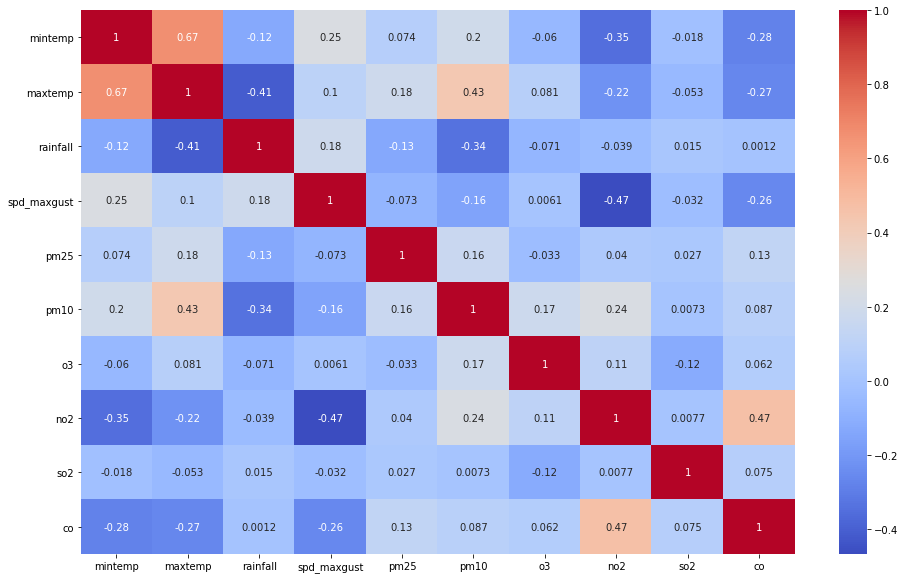

In [31]:
sp_corr = dfweatheraq[['mintemp', 'maxtemp', 'rainfall', 'spd_maxgust', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].corr(method = 'spearman')
display(sp_corr)

fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(sp_corr, annot = True, cmap = 'coolwarm')

In [36]:
dfweatheraq.to_csv('full_data.csv')

<AxesSubplot:xlabel='dir_maxgust', ylabel='pm25'>

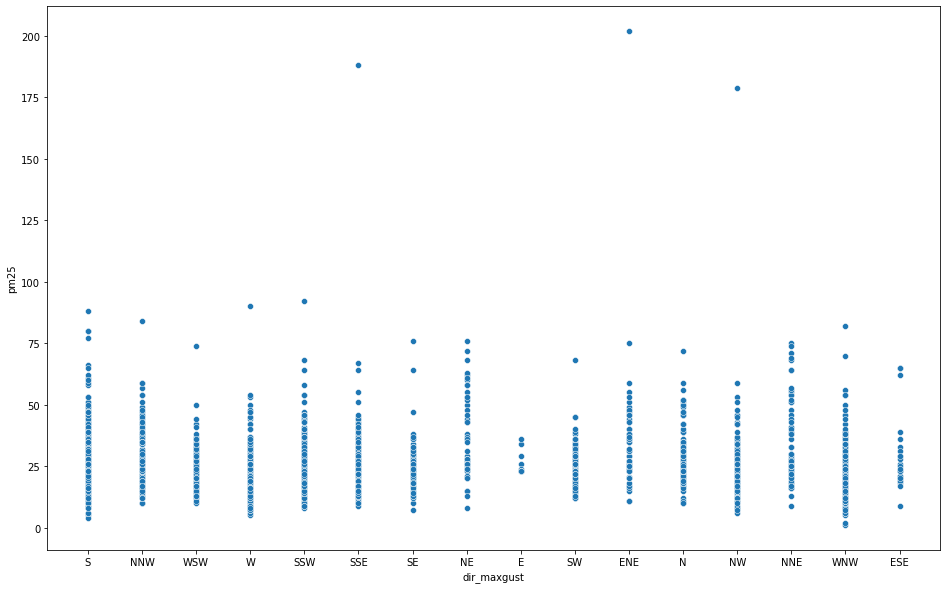

In [32]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(x = 'dir_maxgust', y = 'pm25', data = dfweatheraq)

<AxesSubplot:xlabel='dir_maxgust', ylabel='pm10'>

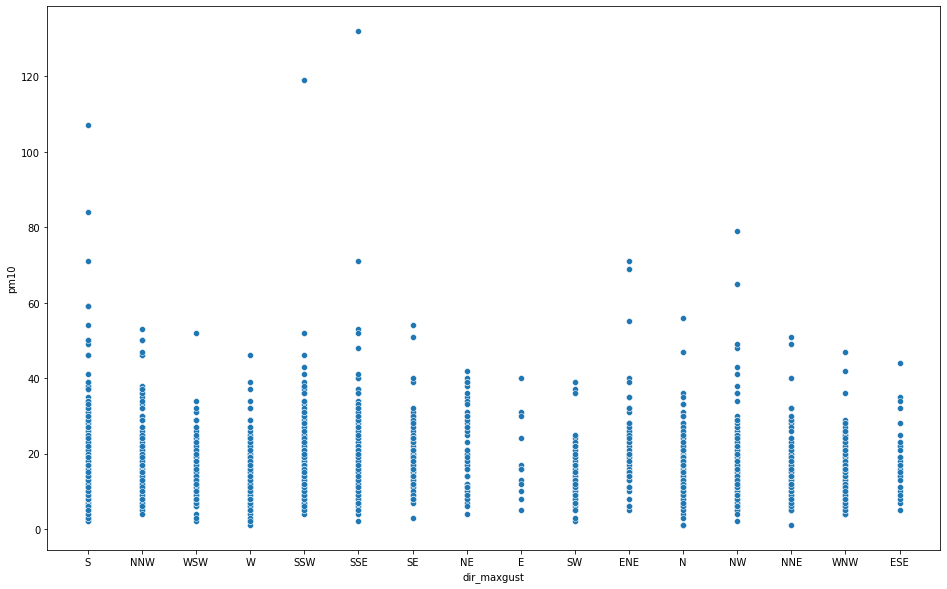

In [33]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(x = 'dir_maxgust', y = 'pm10', data = dfweatheraq)

<AxesSubplot:xlabel='dir_maxgust', ylabel='pm25'>

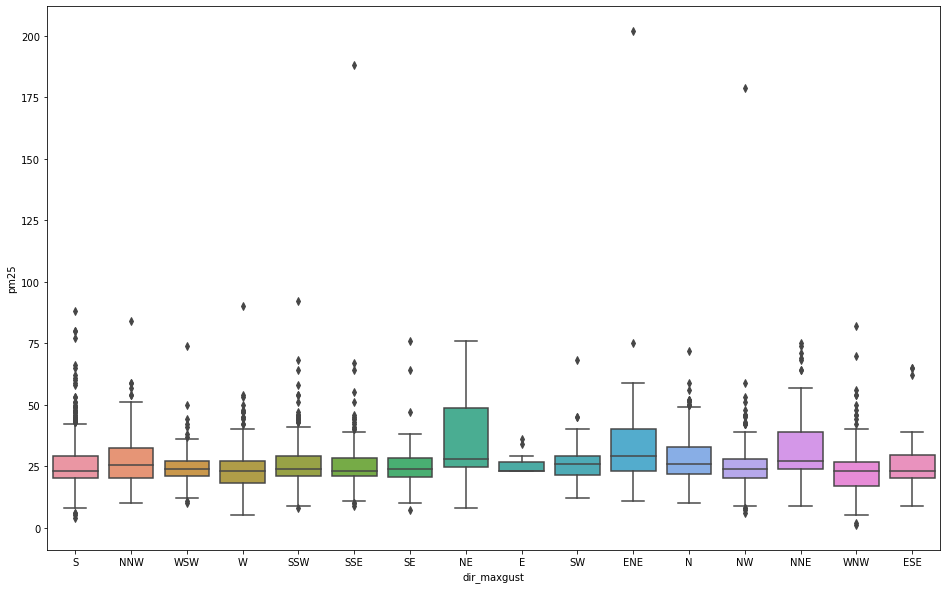

In [34]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.boxplot(x = 'dir_maxgust', y = 'pm25', data = dfweatheraq)

<AxesSubplot:xlabel='dir_maxgust', ylabel='pm10'>

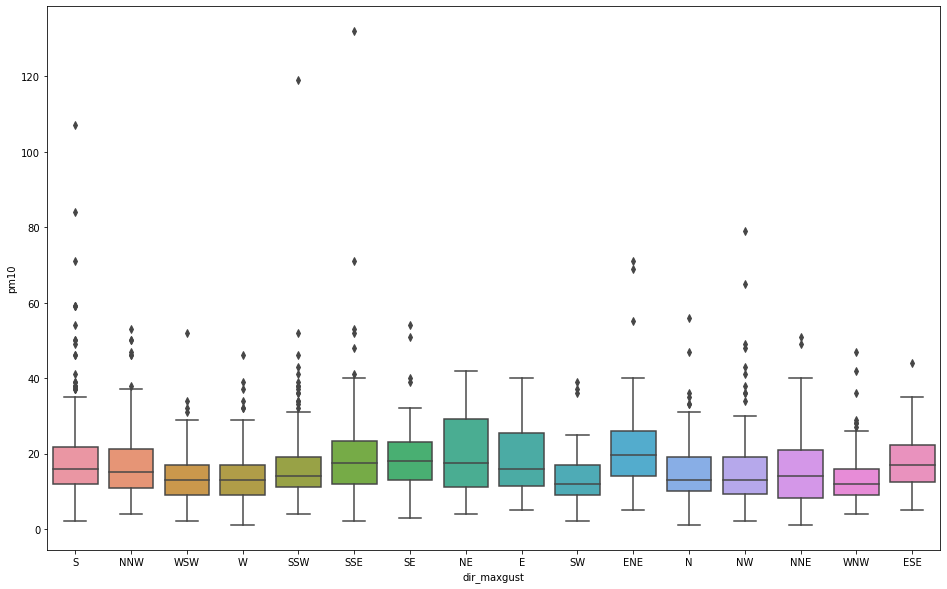

In [35]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.boxplot(x = 'dir_maxgust', y = 'pm10', data = dfweatheraq)

<AxesSubplot:xlabel='rainfall', ylabel='pm10'>

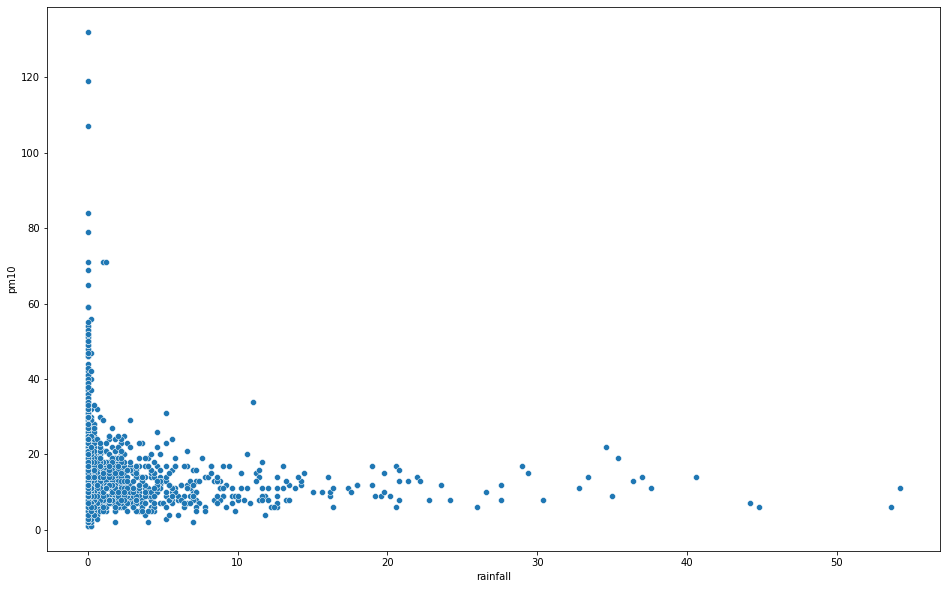

In [36]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(x = 'rainfall', y = 'pm10', data = dfweatheraq)

<AxesSubplot:xlabel='maxtemp', ylabel='pm10'>

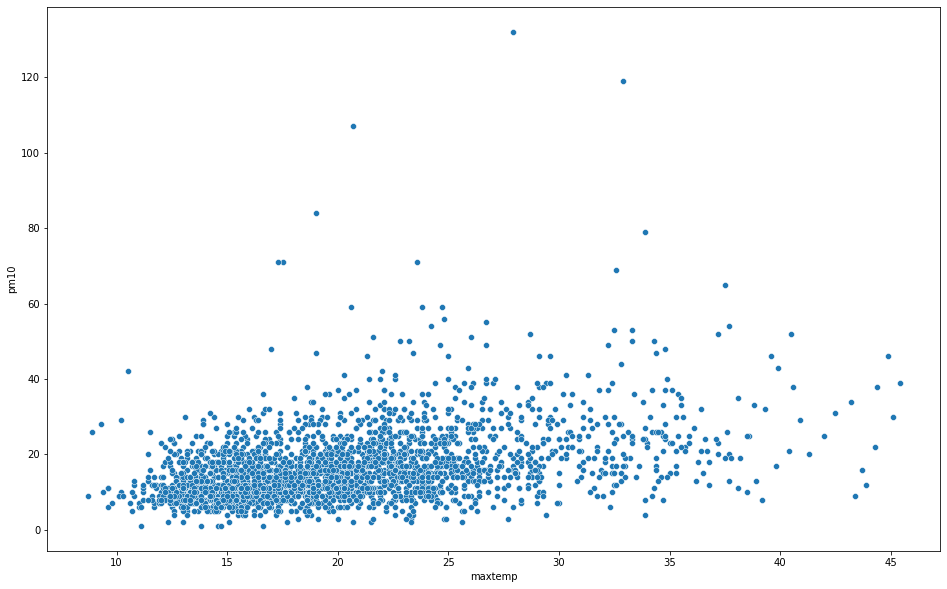

In [37]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(x = 'maxtemp', y = 'pm10', data = dfweatheraq)

<AxesSubplot:xlabel='spd_maxgust', ylabel='pm10'>

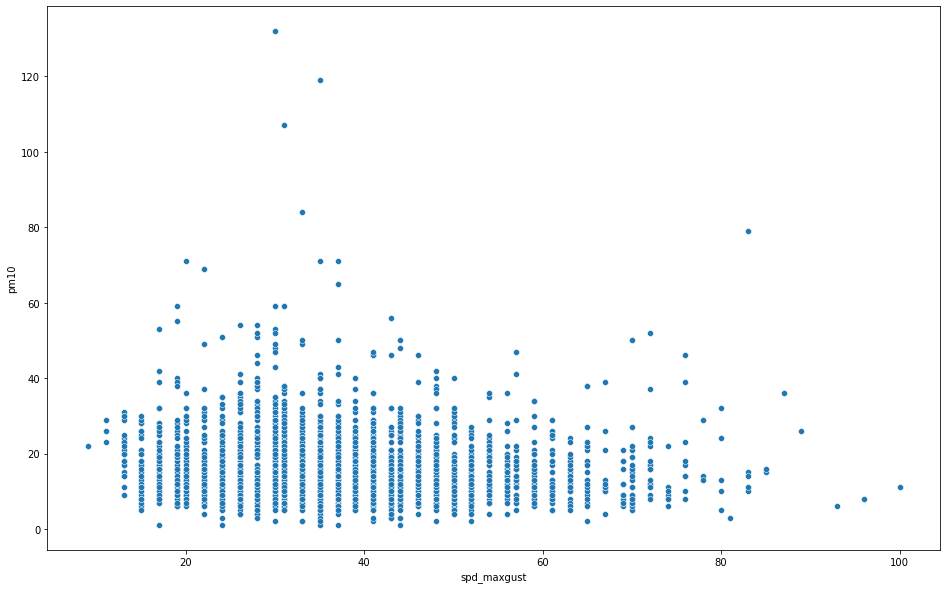

In [38]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(x = 'spd_maxgust', y = 'pm10', data = dfweatheraq)

In [40]:
'''
Looks like there is value in using (for pm10 - pollen category):

1. Max temp - resonable positive correlation
2. Rainfall - decent negative correlation
3. spd_maxgust - ok negative correlation
4. dir_maxgust - boxblots look like higher pm10 seems higher with easterly ish directions


going to add month back in and look at monthly correlations
'''

dfweatheraq['month'] = pd.DatetimeIndex(dfweatheraq['date']).month

<AxesSubplot:xlabel='month', ylabel='pm10'>

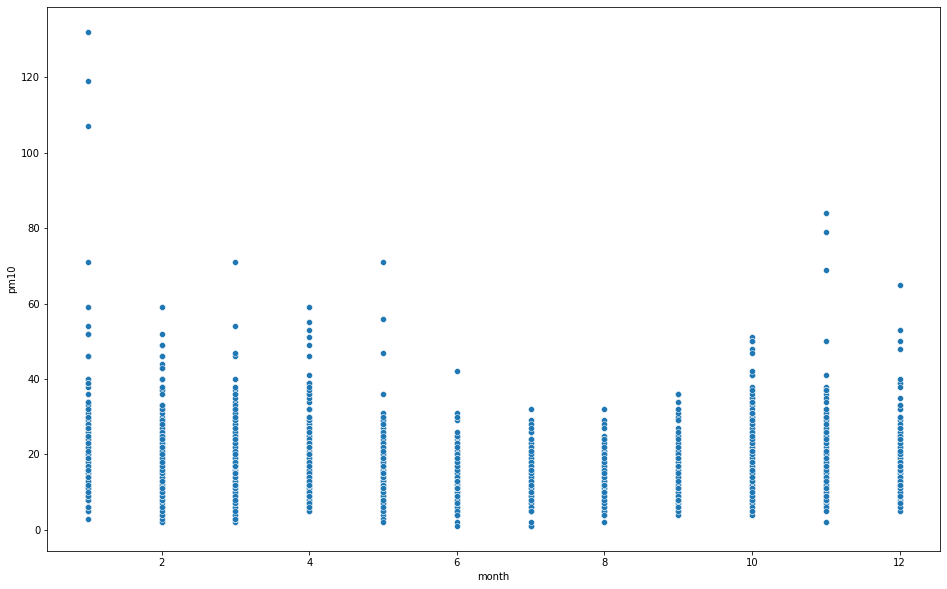

In [41]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(x = 'month', y = 'pm10', data = dfweatheraq)

<AxesSubplot:xlabel='month', ylabel='pm10'>

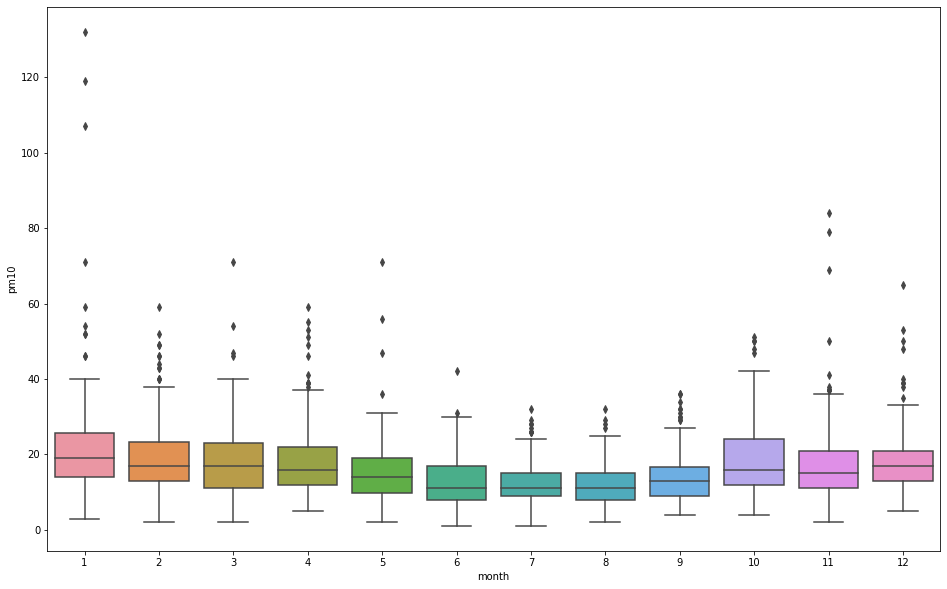

In [42]:
fig, ax = plt.subplots(figsize = (16, 10))
sns.boxplot(x = 'month', y = 'pm10', data = dfweatheraq)

In [43]:
'''
data for regression models

create dataset for categorisation models later - categorise pm10 according to aqicn categories
'''
dfmodeldata = dfweatheraq[['month', 'maxtemp', 'rainfall', 'spd_maxgust', 'dir_maxgust', 'pm10']]
dfmodeldata.head()

month  maxtemp  rainfall  spd_maxgust dir_maxgust  pm10
0     12     22.7       0.0         28.0           S  17.0
1      1     26.0       0.0         59.0         NNW  15.0
2      1     21.4      11.6         35.0         WSW  18.0
3      1     22.3       0.2         50.0         WSW  24.0
4      1     20.6       0.0         65.0         WSW  18.0

In [44]:
'''
This piece will sin transform the month - this should preserve the cyclical nature of the feature
'''

dfmodeldata['mnth_sin'] = np.sin((dfmodeldata.month-1)*(2.*np.pi/12))

<ipython-input-44-b5bb68ebc27e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmodeldata['mnth_sin'] = np.sin((dfmodeldata.month-1)*(2.*np.pi/12))


In [45]:
dfmodeldata.head()


month  maxtemp  rainfall  spd_maxgust dir_maxgust  pm10  mnth_sin
0     12     22.7       0.0         28.0           S  17.0      -0.5
1      1     26.0       0.0         59.0         NNW  15.0       0.0
2      1     21.4      11.6         35.0         WSW  18.0       0.0
3      1     22.3       0.2         50.0         WSW  24.0       0.0
4      1     20.6       0.0         65.0         WSW  18.0       0.0

In [46]:
'''
Need to encode dir_maxgust, then normalise, then train/test split
'''
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

'''
Customising onehotencoder idea comes from here if anyone is interested in reusing:

https://towardsdatascience.com/how-to-assign-labels-with-sklearn-one-hot-encoder-e59a5f17df4f

Need to export this encoder for web use
'''
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_<{self.categories_[i][j]}>')
                j += 1
        return new_columns

encoder = OneHotEncoder(handle_unknown='ignore')
encoded = pd.DataFrame(encoder.fit_transform(dfmodeldata[['dir_maxgust']]))

dfmodeldata = dfmodeldata.join(encoded)
dfmodeldata.head()

month  maxtemp  rainfall  spd_maxgust dir_maxgust  pm10  mnth_sin  \
0     12     22.7       0.0         28.0           S  17.0      -0.5   
1      1     26.0       0.0         59.0         NNW  15.0       0.0   
2      1     21.4      11.6         35.0         WSW  18.0       0.0   
3      1     22.3       0.2         50.0         WSW  24.0       0.0   
4      1     20.6       0.0         65.0         WSW  18.0       0.0   

   dir_maxgust_<E>  dir_maxgust_<ENE>  dir_maxgust_<ESE>  ...  \
0              0.0                0.0                0.0  ...   
1              0.0                0.0                0.0  ...   
2              0.0                0.0                0.0  ...   
3              0.0                0.0                0.0  ...   
4              0.0                0.0                0.0  ...   

   dir_maxgust_<NNW>  dir_maxgust_<NW>  dir_maxgust_<S>  dir_maxgust_<SE>  \
0                0.0               0.0              1.0               0.0   
1                1.0               0.0              0.0               0.0   
2                0.0               0.0              0.0               0.0   
3                0.0               0.0              0.0               0.0   
4                0.0               0.0              0.0               0.0   

   dir_maxgust_<SSE>  dir_maxgust_<SSW>  dir_maxgust_<SW>  dir_maxgust_<W>  \
0                0.0                0.0               0.0              0.0   
1                0.0                0.0               0.0              0.0   
2                0.0                0.0               0.0              0.0   
3                0.0                0.0               0.0              0.0   
4                0.0                0.0               0.0              0.0   

   dir_maxgust_<WNW>  dir_maxgust_<WSW>  
0                0.0                0.0  
1                0.0                0.0  
2                0.0                1.0  
3                0.0                1.0  
4                0.0                1.0  

[5 rows x 23 columns]

In [47]:
dfmodeldata.drop(['month', 'dir_maxgust'], inplace = True, axis = 1)
dfmodeldata.head()

maxtemp  rainfall  spd_maxgust  pm10  mnth_sin  dir_maxgust_<E>  \
0     22.7       0.0         28.0  17.0      -0.5              0.0   
1     26.0       0.0         59.0  15.0       0.0              0.0   
2     21.4      11.6         35.0  18.0       0.0              0.0   
3     22.3       0.2         50.0  24.0       0.0              0.0   
4     20.6       0.0         65.0  18.0       0.0              0.0   

   dir_maxgust_<ENE>  dir_maxgust_<ESE>  dir_maxgust_<N>  dir_maxgust_<NE>  \
0                0.0                0.0              0.0               0.0   
1                0.0                0.0              0.0               0.0   
2                0.0                0.0              0.0               0.0   
3                0.0                0.0              0.0               0.0   
4                0.0                0.0              0.0               0.0   

   ...  dir_maxgust_<NNW>  dir_maxgust_<NW>  dir_maxgust_<S>  \
0  ...                0.0               0.0              1.0   
1  ...                1.0               0.0              0.0   
2  ...                0.0               0.0              0.0   
3  ...                0.0               0.0              0.0   
4  ...                0.0               0.0              0.0   

   dir_maxgust_<SE>  dir_maxgust_<SSE>  dir_maxgust_<SSW>  dir_maxgust_<SW>  \
0               0.0                0.0                0.0               0.0   
1               0.0                0.0                0.0               0.0   
2               0.0                0.0                0.0               0.0   
3               0.0                0.0                0.0               0.0   
4               0.0                0.0                0.0               0.0   

   dir_maxgust_<W>  dir_maxgust_<WNW>  dir_maxgust_<WSW>  
0              0.0                0.0                0.0  
1              0.0                0.0                0.0  
2              0.0                0.0                1.0  
3              0.0                0.0                1.0  
4              0.0                0.0                1.0  

[5 rows x 21 columns]

In [49]:
dfmodeldata.to_csv('pickup.csv')

<AxesSubplot:>

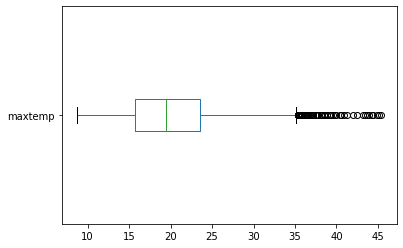

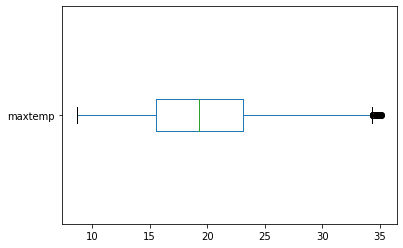

In [50]:
'''
Outlier treatment code migrated from Shibendu's modelling file
'''

dfmodeldata[['maxtemp']].plot.box(vert=False)
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
l,u = outlier_treatment(dfmodeldata['maxtemp'])
dfmodeldata.drop(dfmodeldata[ (dfmodeldata['maxtemp'] > u) | (dfmodeldata['maxtemp'] < l) ].index , inplace=True)
dfmodeldata[['maxtemp']].plot.box(vert=False)

<AxesSubplot:>

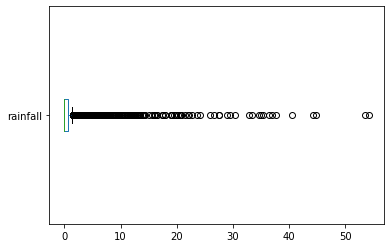

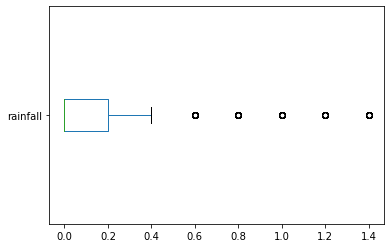

In [52]:
dfmodeldata[['rainfall']].plot.box(vert=False)
l,u = outlier_treatment(dfmodeldata['rainfall'])
dfmodeldata.drop(dfmodeldata[ (dfmodeldata['rainfall'] > u) | (dfmodeldata['rainfall'] < l) ].index , inplace=True)
dfmodeldata[['rainfall']].plot.box(vert=False)

<AxesSubplot:>

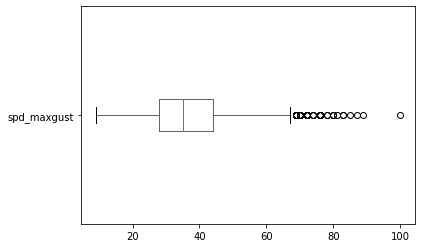

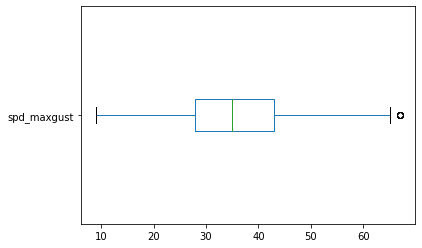

In [54]:
dfmodeldata[['spd_maxgust']].plot.box(vert=False)
l,u = outlier_treatment(dfmodeldata['spd_maxgust'])
dfmodeldata.drop(dfmodeldata[ (dfmodeldata['spd_maxgust'] > u) | (dfmodeldata['spd_maxgust'] < l) ].index , inplace=True)
dfmodeldata[['spd_maxgust']].plot.box(vert=False)

<AxesSubplot:>

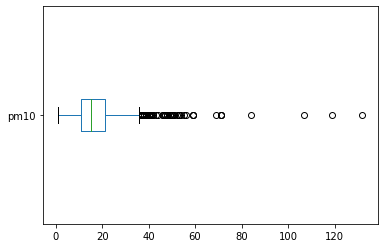

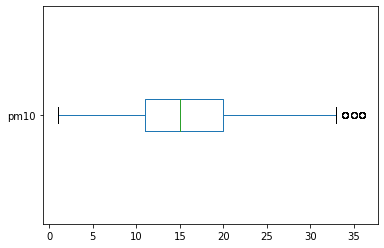

In [83]:
dfmodeldata[['pm10']].plot.box(vert=False)
l,u = outlier_treatment(dfmodeldata['pm10'])
dfmodeldata.drop(dfmodeldata[ (dfmodeldata['pm10'] > u) | (dfmodeldata['pm10'] < l) ].index , inplace=True)
dfmodeldata[['pm10']].plot.box(vert=False)

In [84]:
dfmodeldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1918 entries, 0 to 2580
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtemp            1918 non-null   float64
 1   rainfall           1918 non-null   float64
 2   spd_maxgust        1918 non-null   float64
 3   pm10               1918 non-null   float64
 4   mnth_sin           1918 non-null   float64
 5   dir_maxgust_<E>    1918 non-null   float64
 6   dir_maxgust_<ENE>  1918 non-null   float64
 7   dir_maxgust_<ESE>  1918 non-null   float64
 8   dir_maxgust_<N>    1918 non-null   float64
 9   dir_maxgust_<NE>   1918 non-null   float64
 10  dir_maxgust_<NNE>  1918 non-null   float64
 11  dir_maxgust_<NNW>  1918 non-null   float64
 12  dir_maxgust_<NW>   1918 non-null   float64
 13  dir_maxgust_<S>    1918 non-null   float64
 14  dir_maxgust_<SE>   1918 non-null   float64
 15  dir_maxgust_<SSE>  1918 non-null   float64
 16  dir_maxgust_<SSW>  1918 

In [85]:
dfpredictors = dfmodeldata.drop('pm10', axis = 1)
dfpredictors.head()

maxtemp  rainfall  spd_maxgust  mnth_sin  dir_maxgust_<E>  \
0     22.7       0.0         28.0      -0.5              0.0   
1     26.0       0.0         59.0       0.0              0.0   
3     22.3       0.2         50.0       0.0              0.0   
4     20.6       0.0         65.0       0.0              0.0   
7     19.5       0.0         41.0       0.0              0.0   

   dir_maxgust_<ENE>  dir_maxgust_<ESE>  dir_maxgust_<N>  dir_maxgust_<NE>  \
0                0.0                0.0              0.0               0.0   
1                0.0                0.0              0.0               0.0   
3                0.0                0.0              0.0               0.0   
4                0.0                0.0              0.0               0.0   
7                0.0                0.0              0.0               0.0   

   dir_maxgust_<NNE>  dir_maxgust_<NNW>  dir_maxgust_<NW>  dir_maxgust_<S>  \
0                0.0                0.0               0.0              1.0   
1                0.0                1.0               0.0              0.0   
3                0.0                0.0               0.0              0.0   
4                0.0                0.0               0.0              0.0   
7                0.0                0.0               0.0              0.0   

   dir_maxgust_<SE>  dir_maxgust_<SSE>  dir_maxgust_<SSW>  dir_maxgust_<SW>  \
0               0.0                0.0                0.0               0.0   
1               0.0                0.0                0.0               0.0   
3               0.0                0.0                0.0               0.0   
4               0.0                0.0                0.0               0.0   
7               0.0                0.0                1.0               0.0   

   dir_maxgust_<W>  dir_maxgust_<WNW>  dir_maxgust_<WSW>  
0              0.0                0.0                0.0  
1              0.0                0.0                0.0  
3              0.0                0.0                1.0  
4              0.0                0.0                1.0  
7              0.0                0.0                0.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2580
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtemp            1990 non-null   float64
 1   rainfall           1990 non-null   float64
 2   spd_maxgust        1990 non-null   float64
 3   mnth_sin           1990 non-null   float64
 4   dir_maxgust_<E>    1990 non-null   float64
 5   dir_maxgust_<ENE>  1990 non-null   float64
 6   dir_maxgust_<ESE>  1990 non-null   float64
 7   dir_maxgust_<N>    1990 non-null   float64
 8   dir_maxgust_<NE>   1990 non-null   float64
 9   dir_maxgust_<NNE>  1990 non-null   float64
 10  dir_maxgust_<NNW>  1990 non-null   float64
 11  dir_maxgust_<NW>   1990 non-null   float64
 12  dir_maxgust_<S>    1990 non-null   float64
 13  dir_maxgust_<SE>   1990 non-null   float64
 14  dir_maxgust_<SSE>  1990 non-null   float64
 15  dir_maxgust_<SSW>  1990 non-null   float64
 16  dir_maxgust_<SW>   1990 

In [102]:
dfmodeldata.to_csv('full_removed_outlier.csv')

In [86]:
dftarget = dfmodeldata['pm10']
dftarget.head()

0    17.0
1    15.0
3    24.0
4    18.0
7    14.0
Name: pm10, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfpredictors, dftarget, test_size=0.2, random_state=1337)

In [89]:
'''
From here I am contructing pipelines for the following regression models

1. Logistic Regression
2. RandomForrest Regression
3. SGD
4. SVM
5. KNN Regression
'''
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor




In [90]:
#setting up pipelines for models
pipe_lr = Pipeline([('scl', MinMaxScaler()), ('clf', LogisticRegression())])
pipe_rf = Pipeline([('scl', MinMaxScaler()), ('clf', RandomForestRegressor())])
pipe_sgd = Pipeline([('scl', MinMaxScaler()), ('clf', SGDRegressor())])
pipe_svr = Pipeline([('scl', MinMaxScaler()), ('clf', svm.SVR())])
pipe_knn = Pipeline([('scl', MinMaxScaler()), ('clf', KNeighborsRegressor())])
pipe_mlpr = Pipeline([('scl', MinMaxScaler()), ('clf', MLPRegressor())])

In [99]:
#setting up parameters for tuning

grid_lr = {'clf__penalty': ['l1', 'l2'], 'clf__C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], 'clf__solver': ['liblinear', 'lbfgs']}
grid_rf = {'clf__bootstrap': [True, False], 'clf__max_depth': [10, 30, 50, 70, 90, None], 
           'clf__max_features': ['auto', 'sqrt'], 'clf__min_samples_leaf': [1, 2, 4], 'clf__min_samples_split': [2, 5, 10], 
           'clf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]}
grid_sgd = {'clf__alpha': 10.0 ** -np.arange(1, 7), 'clf__loss': ['squared_loss', 'huber', 'epsilon_insensitive'], 
            'clf__penalty': ['l2', 'l1'], 'clf__learning_rate': ['constant', 'optimal', 'invscaling']}
grid_svr = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'clf__epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 
          'clf__gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]}
grid_knn = {'clf__n_neighbors' : [10, 15, 20, 25, 30, 35, 40, 45, 50], 'clf__weights' : ['uniform', 'distance'], 
            'clf__metric' : ['euclidean', 'manhattan', 'minkowski']}
grid_mlpr =  {"clf__hidden_layer_sizes": [(1,),(50,)], "clf__activation": ["identity", "logistic", "tanh", "relu"],
              "clf__solver": ["lbfgs", "sgd", "adam"], "clf__alpha": [0.00005,0.0005]}

In [100]:
# setting up the gridsearches

gs_lr = GridSearchCV(estimator = pipe_lr, param_grid = grid_lr, scoring='neg_root_mean_squared_error', cv = 2, verbose = 3)
gs_rf = GridSearchCV(estimator = pipe_rf, param_grid = grid_rf, scoring='neg_root_mean_squared_error', cv = 2, n_jobs = -1, verbose = 3)
gs_sgd = GridSearchCV(estimator = pipe_sgd, param_grid = grid_sgd, scoring='neg_root_mean_squared_error', cv = 2, n_jobs = -1, verbose = 3)
gs_svr = GridSearchCV(estimator = pipe_svr, param_grid = grid_svr, scoring='neg_root_mean_squared_error', cv = 2, n_jobs = -1, verbose = 3)
gs_knn = GridSearchCV(estimator = pipe_knn, param_grid = grid_knn, scoring='neg_root_mean_squared_error', cv = 2, n_jobs = -1, verbose = 3)
gs_mlpr = GridSearchCV(estimator = pipe_mlpr, param_grid = grid_mlpr, scoring='neg_root_mean_squared_error', cv = 2, n_jobs = -1, verbose = 3)


grids = [gs_lr, gs_rf, gs_sgd, gs_svr, gs_knn, gs_mlpr]
grid_dict = {0 : 'Logistic Regression', 1 : 'Random Forest Regressor', 2 : 'Stocahstic Gradient Descent Regressor', 
            3 : 'Support Vector Machine Regressor', 4 : 'Nearest Neighbour Regressor', 5 : 'MLP Regressor'}



In [101]:
# Go time.... fingers crossed
print('Performing model optimizations...')

best_score = 100
best_clf = 0
best_gs = ''

for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])	
    # Fit grid search	
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training MAE: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set MAE score for best params: %.3f ' % mean_absolute_error(y_test, y_pred))
    print('Test set R2 score: %.3f ' % r2_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if mean_absolute_error(y_test, y_pred) < best_score:
        best_score = mean_absolute_error(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set MAE: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Fitting 2 folds for each of 28 candidates, totalling 56 fits
[CV 1/2] END clf__C=0.001, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s
[CV 2/2] END clf__C=0.001, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s
[CV 1/2] END clf__C=0.001, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 2/2] END clf__C=0.001, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 1/2] END clf__C=0.001, clf__penalty=l2, clf__solver=liblinear; total time=   0.0s
[CV 2/2] END clf__C=0.001, clf__penalty=l2, clf__solver=liblinear; total time=   0.0s
[CV 1/2] END clf__C=0.001, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s
[CV 2/2] END clf__C=0.001, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s


C:\Users\paulh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

[CV 1/2] END clf__C=0.01, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s
[CV 2/2] END clf__C=0.01, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s
[CV 1/2] END clf__C=0.01, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 2/2] END clf__C=0.01, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 1/2] END clf__C=0.01, clf__penalty=l2, clf__solver=liblinear; total time=   0.0s
[CV 2/2] END clf__C=0.01, clf__penalty=l2, clf__solver=liblinear; total time=   0.0s
[CV 1/2] END clf__C=0.01, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s
[CV 2/2] END clf__C=0.01, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s
[CV 1/2] END clf__C=0.1, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s
[CV 2/2] END clf__C=0.1, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s
[CV 1/2] END .clf__C=0.1, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 2/2] END .clf__C=0.1, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 1/

C:\Users\paulh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

[CV 1/2] END .clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s
[CV 2/2] END .clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s
[CV 1/2] END clf__C=1.0, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s
[CV 2/2] END clf__C=1.0, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s
[CV 1/2] END .clf__C=1.0, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 2/2] END .clf__C=1.0, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 1/2] END clf__C=1.0, clf__penalty=l2, clf__solver=liblinear; total time=   0.0s
[CV 2/2] END clf__C=1.0, clf__penalty=l2, clf__solver=liblinear; total time=   0.0s
[CV 1/2] END .clf__C=1.0, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s


C:\Users\paulh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

[CV 2/2] END .clf__C=1.0, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s
[CV 1/2] END clf__C=10, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s
[CV 2/2] END clf__C=10, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s
[CV 1/2] END ..clf__C=10, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 2/2] END ..clf__C=10, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 1/2] END clf__C=10, clf__penalty=l2, clf__solver=liblinear; total time=   0.0s
[CV 2/2] END clf__C=10, clf__penalty=l2, clf__solver=liblinear; total time=   0.0s


C:\Users\paulh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

[CV 1/2] END ..clf__C=10, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s
[CV 2/2] END ..clf__C=10, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s
[CV 1/2] END clf__C=100, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s
[CV 2/2] END clf__C=100, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s


C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\paulh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\pipel

[CV 1/2] END .clf__C=100, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 2/2] END .clf__C=100, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 1/2] END clf__C=100, clf__penalty=l2, clf__solver=liblinear; total time=   0.0s
[CV 2/2] END clf__C=100, clf__penalty=l2, clf__solver=liblinear; total time=   0.0s
[CV 1/2] END .clf__C=100, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s


C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV 2/2] END .clf__C=100, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s
[CV 1/2] END clf__C=1000, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s
[CV 2/2] END clf__C=1000, clf__penalty=l1, clf__solver=liblinear; total time=   0.0s
[CV 1/2] END clf__C=1000, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 2/2] END clf__C=1000, clf__penalty=l1, clf__solver=lbfgs; total time=   0.0s
[CV 1/2] END clf__C=1000, clf__penalty=l2, clf__solver=liblinear; total time=   0.0s
[CV 2/2] END clf__C=1000, clf__penalty=l2, clf__solver=liblinear; total time=   0.0s


C:\Users\paulh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

[CV 1/2] END clf__C=1000, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s
[CV 2/2] END clf__C=1000, clf__penalty=l2, clf__solver=lbfgs; total time=   0.0s
Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training MAE: -6.766
Test set MAE score for best params: 5.315 
Test set R2 score: 0.024 

Estimator: Random Forest Regressor
Fitting 2 folds for each of 1944 candidates, totalling 3888 fits


C:\Users\paulh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\paulh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-16.57322448          nan  -6.99679663  -7.00170041  -7.00170041
          nan  -6.95270274  -7.00170041  -7.00170041          nan
  -6.7660817   -6.77997224  -7.0518607           nan  -6.95026767
  -7.0054364   -7.0535263           nan  -7.023207    -7.01619235
  -7.13278592          nan  -7.05835716  -6.94609866  -7.13807891
          nan

Best params: {'clf__bootstrap': True, 'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10, 'clf__n_estimators': 1000}
Best training MAE: -6.386
Test set MAE score for best params: 5.031 
Test set R2 score: 0.181 

Estimator: Stocahstic Gradient Descent Regressor
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Best params: {'clf__alpha': 0.001, 'clf__learning_rate': 'optimal', 'clf__loss': 'epsilon_insensitive', 'clf__penalty': 'l1'}
Best training MAE: -6.383
Test set MAE score for best params: 5.019 
Test set R2 score: 0.156 

Estimator: Support Vector Machine Regressor
Fitting 2 folds for each of 539 candidates, totalling 1078 fits
Best params: {'clf__C': 100, 'clf__epsilon': 0.5, 'clf__gamma': 1}
Best training MAE: -6.319
Test set MAE score for best params: 5.055 
Test set R2 score: 0.155 

Estimator: Nearest Neighbour Regressor
Fitting 2 folds for each of 54 candidates, totalling 108 fits
Best params: {'clf__metr

C:\Users\paulh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [103]:
best_gs.best_estimator_.steps[1]

('clf', KNeighborsRegressor(metric='euclidean', n_neighbors=40))

In [98]:
importance = best_gs.best_estimator_.steps[1][1].feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AttributeError: 'KNeighborsRegressor' object has no attribute 'feature_importances_'

In [72]:
dfpredictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2580
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtemp            1990 non-null   float64
 1   rainfall           1990 non-null   float64
 2   spd_maxgust        1990 non-null   float64
 3   mnth_sin           1990 non-null   float64
 4   dir_maxgust_<E>    1990 non-null   float64
 5   dir_maxgust_<ENE>  1990 non-null   float64
 6   dir_maxgust_<ESE>  1990 non-null   float64
 7   dir_maxgust_<N>    1990 non-null   float64
 8   dir_maxgust_<NE>   1990 non-null   float64
 9   dir_maxgust_<NNE>  1990 non-null   float64
 10  dir_maxgust_<NNW>  1990 non-null   float64
 11  dir_maxgust_<NW>   1990 non-null   float64
 12  dir_maxgust_<S>    1990 non-null   float64
 13  dir_maxgust_<SE>   1990 non-null   float64
 14  dir_maxgust_<SSE>  1990 non-null   float64
 15  dir_maxgust_<SSW>  1990 non-null   float64
 16  dir_maxgust_<SW>   1990 

In [87]:
'''
going to try to take the wind direction out
'''

dfpredictors = dfmodeldata[['maxtemp', 'rainfall', 'spd_maxgust', 'mnth_sin']]

In [75]:
dfpredictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2580
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxtemp      1990 non-null   float64
 1   rainfall     1990 non-null   float64
 2   spd_maxgust  1990 non-null   float64
 3   mnth_sin     1990 non-null   float64
dtypes: float64(4)
memory usage: 77.7 KB


In [ ]:
# Save best grid search pipeline to file
dump_file = 'best_gs_pipeline.pkl'
joblib.dump(best_gs, dump_file, compress=1)
print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))